## <CENTER> ЧАСТЬ 1
## <CENTER> ПРЕДОБРАБОТКА ДАННЫХ

В нашем распоряжении есть данные о доходах, заболеваемости, социально незащищённых слоях населения России и другие экономические и демографические данные. Познакомимся с ними поближе

## Данные:

- `child_mortality_rural_1990_2021.xls`—число умерших на первом году жизни детей за год, по всем регионам, в сельской местности.
- `child_mortality_urban_1990_2021.xls`—числоумерших на первом году жизни детей за год, по всем регионам, в городской местности.
- `disabled_total_by_age_2017_2022.csv` — число людей с инвалидностью по регионам, по месяцам, по возрастным группам.
- `morbidity_2005_2020_age_disease.xls` — заболеваемость на 100 тыс. человек населения, по возрастным группам и группам заболеваний.
- `poverty_percent_by_regions_1992_2020.csv` — процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума), оценка за год по регионам.
- `welfare_expense_share_2015_2020`—расходы на социальную политику от общих расходов бюджета региона, % в год*.
- `cash_real_income_wages_2015_2020` — среднедушевые и реальные денежные доходы населения, номинальная и реальная начисленная зарплата, по регионам*.
- `poverty_socdem_20*.xls` — распределение малоимущего населения по социально-демографическим группам (дети, трудящиеся, пенсионеры) за 2017–2020 гг., по регионам.
- `housing_2020` — характеристика жилищных условий домохозяйств. Оценка домохозяйствами состояния занимаемого ими жилого помещения, обследование 2020 года*.
- `population.xlsx` — численность населения по регионам и федеральным округам на 1 января каждого года за 1999–2022 гг.
- `gross_regional_product_1996_2020.xls`—валовойрегиональныйпродукт на душу населения, в рублях.
- `regional_production_*_*.csv` — объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами, по видам деятельности за 2005–2016 гг., 2017–2020 гг. (в тысячах рублей, значение показателя за год, полный круг).
- `retail_turnover_per_capita_2000_2021.xls` — оборот розничной торговли на душу населения, в рублях.

Для начала импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore') 

Все таблицы будем обрабатывать по одному сценарию:

- переименовывать коллонки, если необходимо;
- проверять на правильность написания регионов;
- проверять на наличие пропусков;
- смотреть наличие выбросов;
- смотреть на максимальные и минимальные значения;
- визуализировать данные;
- делать выводы.

Чтобы в итоге иметь одну большую объединенную таблицу, нам необходимо чтобы в каждой отдельной все регионы были одинаково написаны, Не всегда один и тот же регион пишется одинаково в разных датасетах. 

Такое очень часто происходит с написаниями регионов РФ в разных документах, а также в других странах (их нет в данной задаче). Это необходимо учитывать при объединении датасетов. Особенностью Тюменской области является то, что в её состав входят два других субъекта Российской Федерации: Ханты-Мансийский автономный округ — Югра и Ямало-Ненецкий автономный округ. 

При этом чаще всего в датасетах указывается отдельно Тюменская область и отдельно — без учёта автономных округов. То же самое касается Архангельской области — в её состав входит самостоятельный субъект Ненецкий автономный округ. Способы написания такие же, как с Тюменской областью.

На сегодняшний день в РФ существует 89 регионов, но тк большинство данных у нас до 2021 года, то будем ориентироваться на 85 регионов.

In [392]:
#создадим список регионов и будем с ним сверяться:
region=(
'Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Город Москва',
 'Город Санкт-Петербург',
 'Город Севастополь',
 'Еврейская автономная область',
 'Забайкальский край',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкарская Республика',
 'Калининградская область',
 'Калужская область',
 'Камчатский край',
 'Карачаево-Черкесская Республика',
 'Кемеровская область',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Магаданская область',
 'Московская область',
 'Мурманская область',
 'Ненецкий автономный округ',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская область',
 'Пермский край',
 'Приморский край',
 'Псковская область',
 'Республика Адыгея',
 'Республика Алтай',
 'Республика Башкортостан',
 'Республика Бурятия',
 'Республика Дагестан',
 'Республика Ингушетия',
 'Республика Калмыкия',
 'Республика Карелия',
 'Республика Коми',
 'Республика Крым',
 'Республика Марий Эл',
 'Республика Мордовия',
 'Республика Саха (Якутия)',
 'Республика Северная Осетия-Алания',
 'Республика Татарстан',
 'Республика Тыва',
 'Республика Хакасия',
 'Ростовская область',
 'Рязанская область',
 'Самарская область',
 'Саратовская область',
 'Сахалинская область',
 'Свердловская область',
 'Смоленская область',
 'Ставропольский край',
 'Тамбовская область',
 'Тверская область',
 'Томская область',
 'Тульская область',
 'Тюменская область',
 'Удмуртская Республика',
 'Ульяновская область',
 'Хабаровский край',
 'Ханты-Мансийский автономный округ - Югра',
 'Челябинская область',
 'Чеченская Республика',
 'Чукотский автономный округ',
 'Чувашская Республика',
 'Ямало-Ненецкий автономный округ',
 'Ярославская область')
print(len(region))

85


In [628]:
#Составим словарь для замены некоторынх названий регионов:
regions={
 'Архангельская область (кроме Ненецкого автономного округа)':'Архангельская область',
 'Архангельская обл. без данных по Ненецкому авт. окр.': 'Архангельская область',
 'Архангельская область без\nавтономного округа': 'Архангельская область',
 'Архангельская область (без АО)': 'Архангельская область',
 'Архангельская область без авт. округа': 'Архангельская область',
 'Bолгоградская область': 'Волгоградская область',
 'Bологодская область': 'Вологодская область',
 'Bладимирская область': 'Владимирская область',
 'Bоронежская область': 'Воронежская область',
 'Город Москва столица Российской Федерации город федерального значения': 'Город Москва',
 'Город Москва столица Российской Федерации город Федерального значения': 'Город Москва',
 'г.Москва': 'Город Москва',
 'город Москва': 'Город Москва',
 'г. Москва': 'Город Москва',
 'Город Санкт-Петербург город федерального значения':'Город Санкт-Петербург',
 'г.Санкт-Петербург':'Город Санкт-Петербург',
 'город Санкт-Петербург': 'Город Санкт-Петербург',
 'г. Санкт-Петербург': 'Город Санкт-Петербург',
 'Город федерального значения Севастополь': 'Город Севастополь',
 'г.Севастополь': 'Город Севастополь',
 'город Севастополь': 'Город Севастополь',
 'г. Севастополь': 'Город Севастополь',
 'Еврейская авт. область': 'Еврейская автономная область',
 'Кабардино-Балкарская\nРеспублика': 'Кабардино-Балкарская Республика',
 'Кемеровская область (Кузбасс)': 'Кемеровская область',
 'Кемеровская область - Кузбасс': 'Кемеровская область',  
 'Карачаево-Черкесская\nРеспублика': 'Карачаево-Черкесская Республика',
 'Ненецкий автономный округ (Архангельская область)': 'Ненецкий автономный округ',
 'Республика Адыгея (Адыгея)': 'Республика Адыгея',
 'Республика Татарстан (Татарстан)': 'Республика Татарстан',
 'Республика Северная\nОсетия-Алания': 'Республика Северная Осетия-Алания',
 'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)': 'Тюменская область',
 'Тюменская обл.без данных по Ханты-Мансийскому и Ямало-Ненецкому авт. окр.': 'Тюменская область',
 'Тюменская область без\nавтономных округов': 'Тюменская область',
 'Тюменская область (без АО)': 'Тюменская область',
 'Тюменская область без авт. округов': 'Тюменская область',
 'Ханты-Мансийский автономный округ - Югра (Тюменская область)': 'Ханты-Мансийский автономный округ - Югра',
 'Ханты-Мансийский \nавтономный округ - Югра': 'Ханты-Мансийский автономный округ - Югра',
 'Ханты-Мансийский авт. округ': 'Ханты-Мансийский автономный округ - Югра',
 'Чувашская Республика - Чувашия': 'Чувашская Республика',
 'Чеченская и Ингушская Республики': 'Чеченская Республика',
 'Чукотский авт. округ': 'Чукотский автономный округ',
 'Ямало-Ненецкий автономный округ (Тюменская область)': 'Ямало-Ненецкий автономный округ',
 'Ямало-Ненецкий \nавтономный округ': 'Ямало-Ненецкий автономный округ',
 'Ямало-Ненецкий авт. округ': 'Ямало-Ненецкий автономный округ'
}

# Напишем функцию смены названия региона, если он есть в этом словаре:
def region_name(name):
    for i in regions:
        if i in name:
            return regions[i]
    return name

Так как данные из таблиц все разных годов, приведем все к единому формату. Возьмем данные с 2000 до 2021 года. Все остальное удалим, а недостающие данные будем брать за ближайший к пропускам периоду. Далее возьмем среднее значение за эти года. Это и будет таблица для дальнейшей работы.

### `1. Число умерших на первом году жизни детей за год, по всем регионам, в сельской местности`


In [39]:
#Познакомимся с данными:
child_rural = pd.read_excel('data/child_mortality_rural_1990_2021.xls', skiprows=2)
child_rural.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,Оба пола,сельское население,11186.0,10943.0,10111.0,9840.0,9010.0,8582.0,7983.0,...,5463.0,5059.0,4681.0,4165.0,3568.0,3032.0,2521.0,2122.0,1916.0,1852.0
1,Центральный федеральный округ,Оба пола,сельское население,1615.0,1550.0,1361.0,1426.0,1347.0,1321.0,1200.0,...,625.0,608.0,487.0,490.0,426.0,347.0,291.0,211.0,228.0,212.0
2,Белгородская область,Оба пола,сельское население,103.0,92.0,75.0,79.0,80.0,72.0,72.0,...,43.0,48.0,41.0,42.0,36.0,34.0,33.0,16.0,22.0,20.0


In [40]:
#Удалим лишние столбцы, переименуем столбец с регионами и уберем в нем лишние символы:
child_rural.drop(['Unnamed: 1', 'Unnamed: 2'], axis = 1, inplace=True)
child_rural.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
child_rural['Регион'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
child_rural['Регион'] = child_rural['Регион'].str.strip()
#Посмотрим на количесво регионов:
display(len(child_rural['Регион']))

119

In [43]:
#sorted(child_rural['Регион'])

Не будем использовать данные по федеральному округу в совокупности. Во-первых, это агрегированные данные, и чаще всего по ним нельзя сделать никаких интересных выводов, а во-вторых, на протяжении последних 20 лет составы федеральных округов менялись (некоторые регионы меняли принадлежность к округу), из-за чего в них мог произойти резкий рост/снижение численности населения, что не отображало какое-то демографическое явление. 

Несмотря на то, что тут представленны данные по сельской местности, тут есть города Федерального значения, но мы не будем их удалять, тк они нужны нам в дальнейшем для единой таблицы:

In [44]:
#Преобразуем регионы:
child_rural_fed = child_rural[child_rural['Регион'].str.contains('федеральный округ|Федерация|район|Агинский|Коми-Пермяцкий|Корякский|Таймырский|Усть-Ордынский|Эвенкийский')].index
child_rural.drop(child_rural_fed, axis = 0, inplace=True)   
#Удалим лишние области:
child_rural_ar = child_rural[child_rural['Регион']== 'Архангельская область'].index
child_rural_tu = child_rural[child_rural['Регион']== 'Тюменская область'].index
child_rural_ch = child_rural[child_rural['Регион']== 'Чеченская Республика'].index
child_rural.drop(child_rural_ar, axis = 0, inplace=True) 
child_rural.drop(child_rural_tu, axis = 0, inplace=True) 
child_rural.drop(child_rural_ch, axis = 0, inplace=True)
#Посмотрим теперь на размерность:
child_rural.shape

(85, 33)

In [45]:
#Применим нашу функцию на соответствие названий:
child_rural['Регион'] = child_rural['Регион'].apply(region_name)

In [47]:
#sorted(child_rural['Регион'])

Хорошо, количество регионов у нас совпадает.

In [48]:
#Сделаем столбец Регион индексом
child_rural["Регион"] = child_rural["Регион"].str.strip()
child_rural.set_index('Регион', inplace=True)

In [49]:
#Удалим лишние года:
child_rural = child_rural.drop(columns=['1990', '1991', '1992', '1993', '1994', '1995', '1996',
                                        '1997', '1998', '1999']) 

In [50]:
#Посмотрим, есть ли у нас пропуски в таблице:
child_rural.isnull().sum().sum()

104

In [51]:
#Заменим пропуски медианой во всей таблице:
for col in child_rural.columns:
    child_rural[col] = child_rural[col].fillna(child_rural[col].median())

Создадим ДатаФрейм со средними значениями c 2000 по 2021 год:

In [52]:
#Для начала создалим такой столбец:
child_rural['mean'] = child_rural[['2000', '2001', '2002', '2003', '2004', '2005', '2006', 
                                   '2007', '2008', '2009', '2010', '2011', '2012', '2013', 
                                   '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].mean(axis=1).round(2)

Визуализируем наши данные:

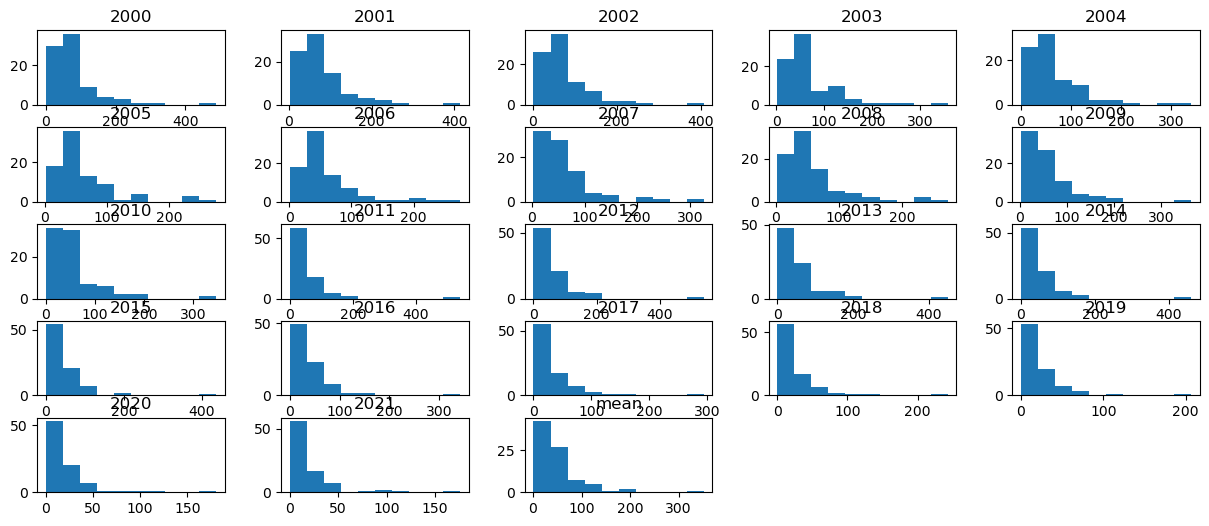

In [54]:
#Посмотрим на общую тенденцию:
child_rural.hist(figsize = (15,6), grid = False);
plt.show()

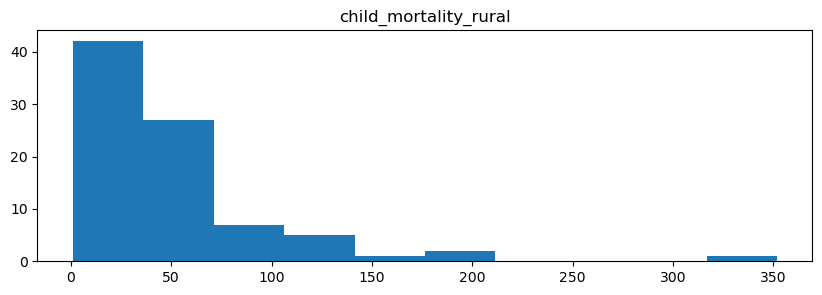

In [55]:
df_child_rural.hist(figsize = (10,3), grid = False);
plt.show()

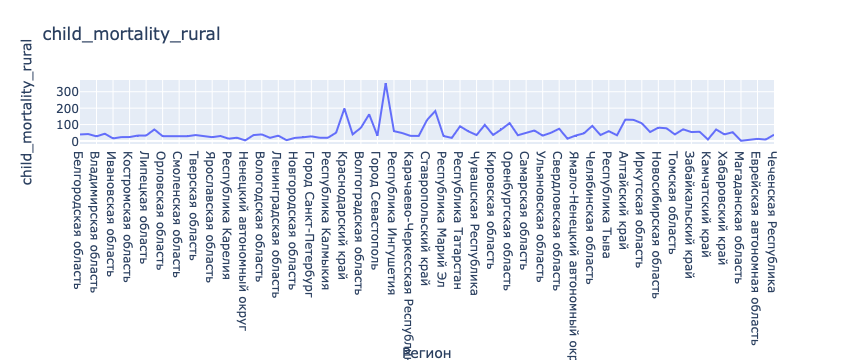

In [56]:
fig = px.line(df_child_rural, y='child_mortality_rural', width = 900, title = 'child_mortality_rural')
fig.show()

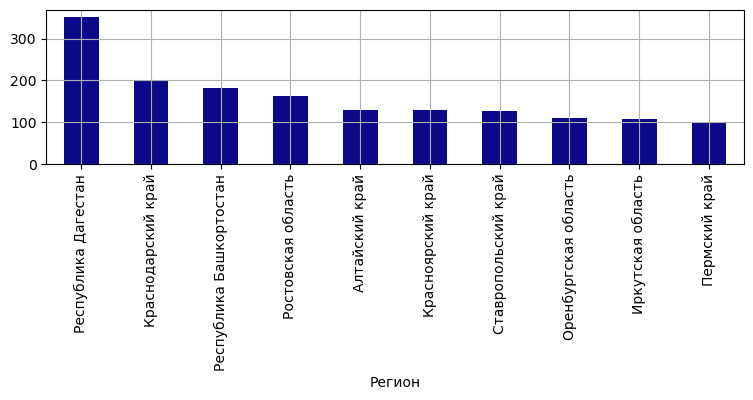

In [57]:
#визуализируем топ-10 регионов
grouped_df = df_child_rural.groupby(['Регион'])['child_mortality_rural'].max()
grouped_df = grouped_df.nlargest(10)
grouped_df.plot(
    kind='bar',
    grid=True,
    figsize=(9, 2),
    colormap='plasma'
);

In [58]:
#Посмотрим где больше всего
df_child_rural.loc[df_child_rural['child_mortality_rural'].idxmax()]

child_mortality_rural    351.95
Name: Республика Дагестан, dtype: float64

In [59]:
#посмотреть где меньше всего
df_child_rural.loc[df_child_rural['child_mortality_rural'].idxmin()]

child_mortality_rural    0.95
Name: Магаданская область, dtype: float64

In [60]:
#Среднее значение по всем регионам:
print(df_child_rural.mean().round(2))

child_mortality_rural    52.51
dtype: float64


**Вывод:
Самое высокое число умерших на первом году жизни детей за год, по всем регионам, в сельской местности принадлежит `Республике Дагестан` (352), самое низкое- `Магаданской области`(1). Можно заметить общую тенденцию к снижению по всем регионам из года в год. Что скорее всего можно обяснить улучшением качества жизни, появлением новых лекарств и тд.
Среднее значение по всем регионам: 53**


In [61]:
#Сохраним данную таблицу для дальнейшей работы:
df_child_rural = df_child_rural.to_csv('data/total/df_child_rural.csv', index=False)

Проделае те же действия с другими таблицами

### `2.Числоумерших на первом году жизни детей за год, по всем регионам, в городской местности.`

In [80]:
child_urban = pd.read_excel('data/child_mortality_urban_1990_2021.xls', skiprows=2)
display(child_urban.head(3))

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,Оба пола,городское население,23902.0,21549.0,19097.0,18106.0,17131.0,16258.0,14842.0,...,10843.0,10418.0,9641.0,8499.0,7860.0,6545.0,5723.0,5206.0,4573.0,4664.0
1,Центральный федеральный округ,Оба пола,городское население,5317.0,4734.0,4175.0,3899.0,3871.0,3631.0,3254.0,...,2789.0,2735.0,2402.0,2228.0,2146.0,1785.0,1593.0,1409.0,1153.0,1192.0
2,Белгородская область,Оба пола,городское население,209.0,198.0,165.0,165.0,153.0,131.0,102.0,...,84.0,68.0,62.0,68.0,72.0,43.0,40.0,23.0,25.0,34.0


In [81]:
#Удалим лишние столбцы, переименуем столбец с регионами и уберем в нем лишние символы
child_urban.drop(['Unnamed: 1', 'Unnamed: 2'], axis = 1, inplace=True)
child_urban.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
child_urban['Регион'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
child_urban['Регион'] = child_urban['Регион'].str.strip()
display(len(child_urban['Регион']))

119

In [82]:
#Преобразуем регионы:
child_urban_fed = child_urban[child_urban['Регион'].str.contains('федеральный округ|Федерация|район|Агинский|Коми-Пермяцкий|Корякский|Таймырский|Усть-Ордынский|Эвенкийский')].index
child_urban.drop(child_urban_fed, axis = 0, inplace=True)   
#Удалим Архангельскую и Тюменскую области:
child_urban_ar = child_urban[child_urban['Регион']== 'Архангельская область'].index
child_urban_tu = child_urban[child_urban['Регион']== 'Тюменская область'].index
child_urban_ch = child_urban[child_urban['Регион']== 'Чеченская Республика'].index
child_urban.drop(child_urban_ar, axis = 0, inplace=True) 
child_urban.drop(child_urban_tu, axis = 0, inplace=True) 
child_urban.drop(child_urban_ch, axis = 0, inplace=True)
#Посмотрим теперь на размерность:
child_urban.shape

(85, 33)

In [83]:
child_urban['Регион'] = child_urban['Регион'].apply(region_name)

Хорошо, количество регионов у нас совпадает.

In [84]:
#Сделаем проверку на соответствие регионов:
child_urban['mask'] = child_urban['Регион'].apply(lambda x: 1 if x in region else 0)
print(len(child_urban['Регион'].unique()))
#print(child_urban['mask'])

85


In [85]:
#Сделаем столбец Регион индексом
child_urban["Регион"] = child_urban["Регион"].str.strip()
child_urban.set_index('Регион', inplace=True)

In [86]:
#Удалим лишние года:
child_urban = child_urban.drop(columns=['1990', '1991', '1992', '1993', '1994', '1995', '1996',
                                        '1997', '1998', '1999']) 

In [87]:
#Посмотрим на количество пропусков:
child_urban.isnull().sum().sum()

79

In [88]:
#Заменим пропуски медианой во всей таблице:
for col in child_urban.columns:
    child_urban[col] = child_urban[col].fillna(child_urban[col].median())

Создадим ДатаФрейм со средним значением c 2000 по 2021 год:

In [89]:
#Для начала создалим такой столбец:
child_urban['mean'] = child_urban[['2000', '2001', '2002', '2003', '2004', '2005', '2006', 
                                   '2007', '2008', '2009', '2010', '2011', '2012', '2013', 
                                   '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].mean(axis=1).round(2)

In [90]:
df_child_urban= child_urban[['mean']]
df_child_urban.rename(columns={'mean':"child_mortality_urban"}, inplace=True)
df_child_urban.head(3)

,child_mortality_urban
Регион,
Белгородская область,63.64
Брянская область,70.18
Владимирская область,84.77


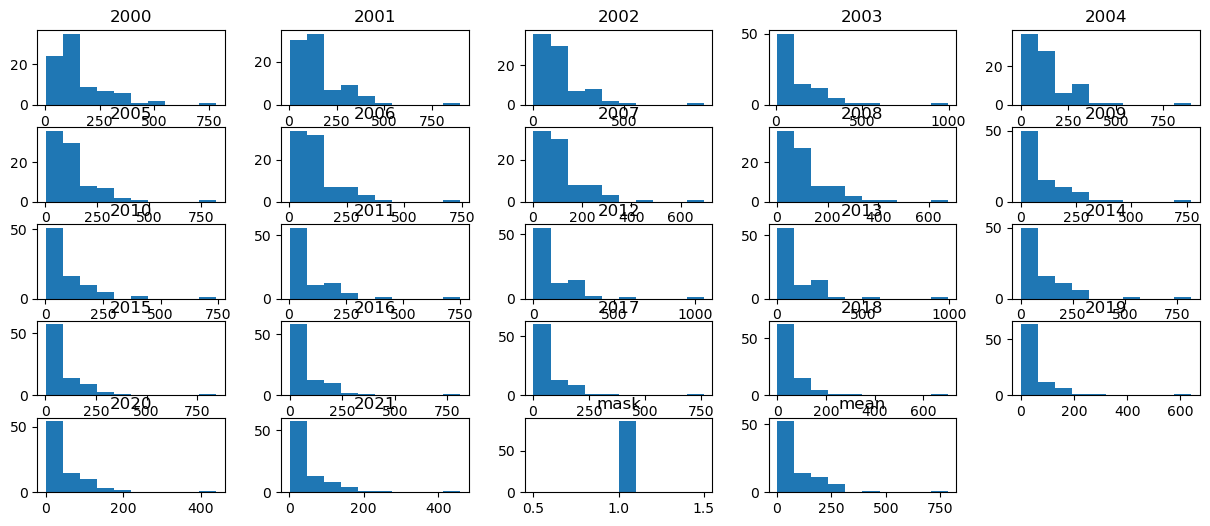

In [91]:
#Посмотрим на общую тенденцию:
child_urban.hist(figsize = (15,6), grid = False);
plt.show()

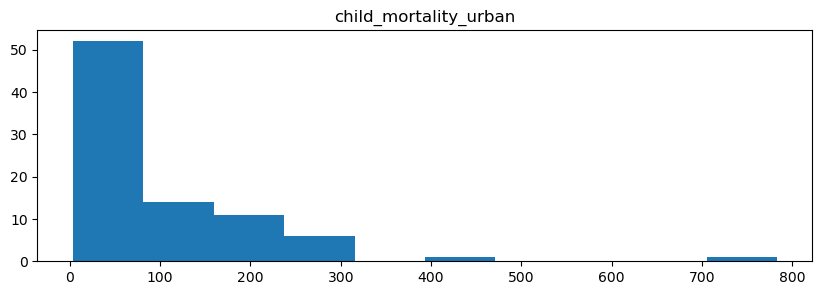

In [92]:
#Посмотрим на средние значения:
df_child_urban.hist(figsize = (10,3), grid = False);
plt.show()

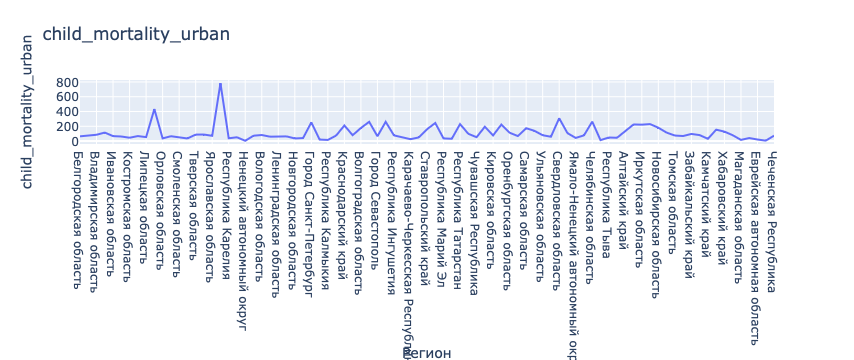

In [93]:
fig = px.line(df_child_urban, y='child_mortality_urban', width = 900, title = 'child_mortality_urban')
fig.show()

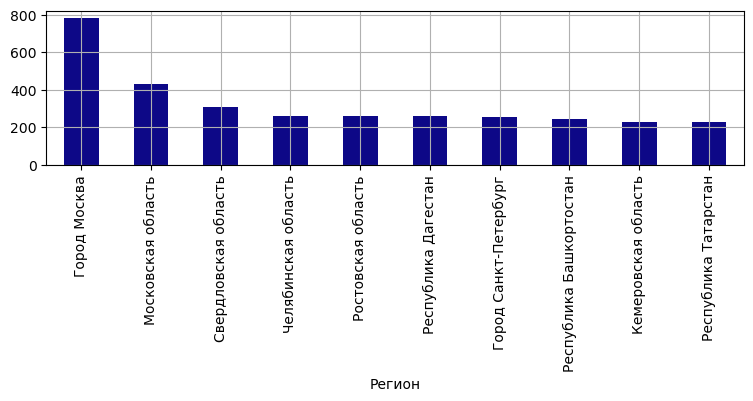

In [94]:
#визуализируем топ-10 регионов
grouped_df = df_child_urban.groupby(['Регион'])['child_mortality_urban'].max()
grouped_df = grouped_df.nlargest(10)
grouped_df.plot(
    kind='bar',
    grid=True,
    figsize=(9, 2),
    colormap='plasma'
);

In [95]:
#Посмотрим где больше всего
df_child_urban.loc[df_child_urban['child_mortality_urban'].idxmax()]

child_mortality_urban    783.36
Name: Город Москва, dtype: float64

In [96]:
#посмотреть где меньше всего
df_child_urban.loc[df_child_urban['child_mortality_urban'].idxmin()]

child_mortality_urban    3.14
Name: Ненецкий автономный округ, dtype: float64

In [97]:
#Среднее значение по всем регионам:
print(df_child_urban.mean().round(2))

child_mortality_urban    108.53
dtype: float64


**Вывод: А вот теперь первое место у Москвы (783) и Московской области, скорее всего это связано с количеством живущих людей в Москве, которое в разы превосодит другие города. И количество в Москве в 7 раз выше среднего значения по всем регионам. Самое низкое колличество у Ненецкого автономного округа.**

In [98]:
#Сохраним данную таблицу для дальнейшей работы:
df_child_urban = df_child_urban.to_csv('data/total/df_child_urban.csv', index=False)

### `3. Число людей с инвалидностью по регионам, по месяцам, по возрастным группам.`

In [151]:
disabled = pd.read_csv('data/disabled_total_by_age_2017_2022.csv')
display(disabled.head(3))

,region,total,18_30,31_40,41_50,51_60,60_,date
0,Российская Федерация,11640873.0,550895.0,766054.0,1030652.0,2135436.0,7157836.0,2017-01-01
1,Центральный федеральный округ,3420310.0,118579.0,172662.0,257484.0,598102.0,2273483.0,2017-01-01
2,Белгородская область,223030.0,6318.0,10383.0,16596.0,37444.0,152289.0,2017-01-01


Разберемся сначала с регионами.

In [100]:
#Удалим лишние столбцы, переименуем столбец с регионами и уберем в нем лишние символы
disabled.rename(columns={'region':"Регион"}, inplace=True)
disabled.rename(columns={'date':'Год'}, inplace=True)
disabled['Регион'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
disabled['Регион'] = disabled['Регион'].str.strip()
display(len(disabled['Регион']))

6080

In [ ]:
#sorted(disabled['Регион'].unique())

In [101]:
#Преобразуем регионы:
disabled_fed = disabled[disabled['Регион'].str.contains('федеральный округ|Федерация|район')].index
disabled.drop(disabled_fed, axis = 0, inplace=True)  

disabled_ba = disabled[disabled['Регион']== 'г. Байконур'].index
disabled.drop(disabled_ba, axis = 0, inplace=True) 
#disabled.head()

In [102]:
disabled['Регион'] = disabled['Регион'].apply(region_name)
#disabled.head()

In [104]:
#Сделаем проверку на соответствие регионов:
disabled['mask'] = disabled['Регион'].apply(lambda x: 1 if x in region else 0)
print(len(disabled['Регион'].unique()))
#print(disabled['mask'])

85


In [105]:
#Сделаем столбец Регион индексом
disabled["Регион"] = disabled["Регион"].str.strip()
disabled.set_index('Регион', inplace=True)

**Создадим несколько таблиц по годам:**

Создадим несколько таблиц с суммарными результатами  по годам:

In [106]:
disabled['Год'] = pd.to_datetime(disabled['Год']).dt.year
disabled['31_60'] = disabled[['31_40', '41_50', '51_60']].sum(axis=1)

In [107]:
disabled_total = disabled.groupby(['Регион', 'Год'])['total'].sum().unstack()
disabled_18_30 = disabled.groupby(['Регион', 'Год'])['18_30'].sum().unstack()
disabled_31_60 = disabled.groupby(['Регион', 'Год'])['31_60'].sum().unstack()
disabled_61_ = disabled.groupby(['Регион', 'Год'])['60_'].sum().unstack()

Добавим недостающие года в таблицу `disabled_total` :

In [108]:
disabled_total[2000]=disabled_total[2017].median()
disabled_total[2001]=disabled_total[2017].median()
disabled_total[2002]=disabled_total[2017].median()
disabled_total[2003]=disabled_total[2017].median()
disabled_total[2004]=disabled_total[2017].median()
disabled_total[2005]=disabled_total[2017].median()
disabled_total[2006]=disabled_total[2017].median()
disabled_total[2007]=disabled_total[2017].median()
disabled_total[2008]=disabled_total[2017].median()
disabled_total[2009]=disabled_total[2017].median()
disabled_total[2010]=disabled_total[2017].median()
disabled_total[2011]=disabled_total[2017].median()
disabled_total[2012]=disabled_total[2017].median()
disabled_total[2013]=disabled_total[2017].median()
disabled_total[2014]=disabled_total[2017].median()
disabled_total[2015]=disabled_total[2017].median()
disabled_total[2016]=disabled_total[2017].median()
disabled_total= disabled_total[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))]
disabled_total.head(3)                                

Год,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регион,,,,,,,,,,,,,,,,,,,,,
Алтайский край,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,...,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1987350.0,2120203.0,2100077.0,2060817.0,1986766.0
Амурская область,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,...,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,816315.0,797050.0,785693.0,766768.0,733732.0
Архангельская область,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,...,1177038.0,1177038.0,1177038.0,1177038.0,1177038.0,1056888.0,1038542.0,1031766.0,1016584.0,978993.0


In [109]:
#Посмотрим на количество пропусков:
disabled_total.isnull().sum().sum()

0

Пропусков нет, отлично!

Подготовим таблицу к дальнейшему соединению с другими таблицами:

In [110]:
#Для начала создалим такой столбец:
disabled_total['mean'] = disabled_total[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [111]:
df_disabled_total= disabled_total[['mean']]
df_disabled_total.rename(columns={'mean':"disabled_total"}, inplace=True)
df_disabled_total.head(3)

Год,disabled_total
Регион,
Алтайский край,1375675.41
Амурская область,1086782.00
Архангельская область,1142382.68


In [112]:
#Сохраним данную таблицу для дальнейшей работы:
df_disabled_total = df_disabled_total.to_csv('data/total/df_disabled_total.csv', index=False)

Добавим недостающие года в таблицу `disabled_18_30`:

In [113]:
disabled_18_30[2000]=disabled_18_30[2017].median()
disabled_18_30[2001]=disabled_18_30[2017].median()
disabled_18_30[2002]=disabled_18_30[2017].median()
disabled_18_30[2003]=disabled_18_30[2017].median()
disabled_18_30[2004]=disabled_18_30[2017].median()
disabled_18_30[2005]=disabled_18_30[2017].median()
disabled_18_30[2006]=disabled_18_30[2017].median()
disabled_18_30[2007]=disabled_18_30[2017].median()
disabled_18_30[2008]=disabled_18_30[2017].median()
disabled_18_30[2009]=disabled_18_30[2017].median()
disabled_18_30[2010]=disabled_18_30[2017].median()
disabled_18_30[2011]=disabled_18_30[2017].median()
disabled_18_30[2012]=disabled_18_30[2017].median()
disabled_18_30[2013]=disabled_18_30[2017].median()
disabled_18_30[2014]=disabled_18_30[2017].median()
disabled_18_30[2015]=disabled_18_30[2017].median()
disabled_18_30[2016]=disabled_18_30[2017].median()
disabled_18_30= disabled_18_30[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))]
disabled_18_30.head(3) 

Год,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регион,,,,,,,,,,,,,,,,,,,,,
Алтайский край,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,...,49558.0,49558.0,49558.0,49558.0,49558.0,94519.0,95338.0,89164.0,85613.0,86568.0
Амурская область,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,...,49558.0,49558.0,49558.0,49558.0,49558.0,42770.0,40072.0,38800.0,38740.0,39246.0
Архангельская область,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,49558.0,...,49558.0,49558.0,49558.0,49558.0,49558.0,40644.0,37840.0,35587.0,34644.0,35213.0


Подготовим таблицу к дальнейшему соединению с другими таблицами:

In [114]:
#Для начала создалим такой столбец:
disabled_18_30['mean'] = disabled_18_30[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [115]:
df_disabled_18_30= disabled_18_30[['mean']]
df_disabled_18_30.rename(columns={'mean':"disabled_18_30"}, inplace=True)
df_disabled_18_30.head(3)

Год,disabled_18_30
Регион,
Алтайский край,58804.00
Амурская область,47368.82
Архангельская область,46655.18


In [116]:
#Сохраним данную таблицу для дальнейшей работы:
df_disabled_18_30 = df_disabled_18_30.to_csv('data/total/df_disabled_18_30.csv', index=False)

Добавим недостающие года в таблицу `df_disabled_31_60`:

In [117]:
disabled_31_60[2000]=disabled_31_60[2017].median()
disabled_31_60[2001]=disabled_31_60[2017].median()
disabled_31_60[2002]=disabled_31_60[2017].median()
disabled_31_60[2003]=disabled_31_60[2017].median()
disabled_31_60[2004]=disabled_31_60[2017].median()
disabled_31_60[2005]=disabled_31_60[2017].median()
disabled_31_60[2006]=disabled_31_60[2017].median()
disabled_31_60[2007]=disabled_31_60[2017].median()
disabled_31_60[2008]=disabled_31_60[2017].median()
disabled_31_60[2009]=disabled_31_60[2017].median()
disabled_31_60[2010]=disabled_31_60[2017].median()
disabled_31_60[2011]=disabled_31_60[2017].median()
disabled_31_60[2012]=disabled_31_60[2017].median()
disabled_31_60[2013]=disabled_31_60[2017].median()
disabled_31_60[2014]=disabled_31_60[2017].median()
disabled_31_60[2015]=disabled_31_60[2017].median()
disabled_31_60[2016]=disabled_31_60[2017].median()
disabled_31_60= disabled_31_60[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))]
disabled_31_60.head(3) 

Год,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регион,,,,,,,,,,,,,,,,,,,,,
Алтайский край,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,...,372820.0,372820.0,372820.0,372820.0,372820.0,627934.0,668593.0,656576.0,642483.0,626986.0
Амурская область,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,...,372820.0,372820.0,372820.0,372820.0,372820.0,285231.0,275678.0,267572.0,257453.0,246659.0
Архангельская область,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,372820.0,...,372820.0,372820.0,372820.0,372820.0,372820.0,303932.0,296682.0,292408.0,286991.0,280348.0


In [118]:
#Посмотрим на количество пропусков:
disabled_31_60.isnull().sum().sum()

0

Подготовим таблицу к дальнейшему соединению с другими таблицами:

In [119]:
#Для начала создалим такой столбец:
disabled_31_60['mean'] = disabled_31_60[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [120]:
df_disabled_31_60= disabled_31_60[['mean']]
df_disabled_31_60.rename(columns={'mean':"disabled_31_60"}, inplace=True)
df_disabled_31_60.head(3)

Год,disabled_31_60
Регион,
Алтайский край,434568.73
Амурская область,348660.59
Архангельская область,354468.23


In [121]:
#Сохраним данную таблицу для дальнейшей работы:
df_disabled_31_60 = df_disabled_31_60.to_csv('data/total/df_disabled_31_60.csv', index=False)

Добавим недостающие года в таблицу `disabled_61_`:

In [122]:
disabled_61_[2000]=disabled_61_[2017].median()
disabled_61_[2001]=disabled_61_[2017].median()
disabled_61_[2002]=disabled_61_[2017].median()
disabled_61_[2003]=disabled_61_[2017].median()
disabled_61_[2004]=disabled_61_[2017].median()
disabled_61_[2005]=disabled_61_[2017].median()
disabled_61_[2006]=disabled_61_[2017].median()
disabled_61_[2007]=disabled_61_[2017].median()
disabled_61_[2008]=disabled_61_[2017].median()
disabled_61_[2009]=disabled_61_[2017].median()
disabled_61_[2010]=disabled_61_[2017].median()
disabled_61_[2011]=disabled_61_[2017].median()
disabled_61_[2012]=disabled_61_[2017].median()
disabled_61_[2013]=disabled_61_[2017].median()
disabled_61_[2014]=disabled_61_[2017].median()
disabled_61_[2015]=disabled_61_[2017].median()
disabled_61_[2016]=disabled_61_[2017].median()
disabled_61_= disabled_61_[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))]
disabled_61_.head(3) 

Год,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регион,,,,,,,,,,,,,,,,,,,,,
Алтайский край,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,...,712312.0,712312.0,712312.0,712312.0,712312.0,1264897.0,1356272.0,1354337.0,1332721.0,1273212.0
Амурская область,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,...,712312.0,712312.0,712312.0,712312.0,712312.0,488314.0,481300.0,479321.0,470575.0,447827.0
Архангельская область,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,...,712312.0,712312.0,712312.0,712312.0,712312.0,712312.0,704020.0,703771.0,694949.0,663432.0


In [123]:
#Посмотрим на количество пропусков:
disabled_61_.isnull().sum().sum()

0

Подготовим таблицу к дальнейшему соединению с другими таблицами:

In [124]:
#Для начала создалим такой столбец:
disabled_61_['mean'] = disabled_61_[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [125]:
df_disabled_61_= disabled_61_[['mean']]
df_disabled_61_.rename(columns={'mean':"disabled_61_"}, inplace=True)
df_disabled_61_.head(3)

Год,disabled_61_
Регион,
Алтайский край,849579.23
Амурская область,658029.14
Архангельская область,708535.82


In [127]:
#Сохраним данную таблицу для дальнейшей работы:
df_disabled_61_ = df_disabled_61_.to_csv('data/total/df_disabled_61_.csv', index=False)

Визуализируем наши данные:

**Вывод:** Самое большое количество людей с инвалидностью дло 30 лет приходится на республику Дагестан, в то время как после 60 лдидером становится Москва, опять же потому что в Москве проживает больше всего людей. Москва также лидирует и по общему количеству. А вот меньше всего в городе Байконур

### `4. Заболеваемость на 100 тыс.чел. населения, по возрастным группам и группам заболеваний`

In [396]:
morbidity = pd.read_excel('data/morbidity_2005_2020_age_disease.xls', skiprows=2)
display(morbidity.head(3))

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,"Беременность, роды и послеродовой период",0-14 лет,21.3,17.6,17.9,22.1,18.1,18.9,16.2,17.7,12.2,12.1,8.1,15.5
1,Российская Федерация,"Беременность, роды и послеродовой период",15-17 лет,1537.3,1527.5,1605.2,1681.5,1618.9,1451.3,1247.6,1229.1,1272.3,1186.5,914.0,794.0
2,Российская Федерация,"Беременность, роды и послеродовой период",18 лет и старше,6731.7,6833.5,7229.7,7516.9,8007.5,8084.4,7981.6,8141.8,8084.6,8219.9,7734.1,7278.6


Переименуем колонны:

In [397]:
morbidity.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
morbidity.rename(columns={'Unnamed: 1':"Заболевание"}, inplace=True)
morbidity.rename(columns={'Unnamed: 2':"Возраст"}, inplace=True)

Посмотрим на все категории заболеваний:

In [398]:
#print(morbidity['Заболевание'].unique())

Преобразуем регионы, как и в предыдущих таблицах

In [399]:
morbidity['Регион'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
morbidity['Регион'] = morbidity['Регион'].str.strip()

In [400]:
morbidity_fed = morbidity[morbidity['Регион'].str.contains('федеральный округ|Федерация|район')].index
morbidity.drop(morbidity_fed, axis = 0, inplace=True)

morbidity_so = morbidity[morbidity['Регион']== 'Республика Северная Осетия - Алания'].index
morbidity.drop(morbidity_so, axis = 0, inplace=True) 

morbidity_ad = morbidity[morbidity['Регион']== 'Республика Адыгея (Адыгея) (до 03.06.2014)'].index
morbidity.drop(morbidity_ad, axis = 0, inplace=True)

#sorted(morbidity['Регион'].unique())

In [401]:
morbidity['Регион'] = morbidity['Регион'].apply(region_name)

In [402]:
#Оставим только один возраст `Всего`
morbidity = morbidity[morbidity['Возраст'] == 'Всего']

In [403]:
#Добавим недостающие года, заменив пустые значения медианой ближайшего года:
morbidity['2000']=morbidity['2005'].median()
morbidity['2001']=morbidity['2005'].median()
morbidity['2002']=morbidity['2005'].median()
morbidity['2003']=morbidity['2005'].median()
morbidity['2004']=morbidity['2005'].median()
morbidity['2017']=morbidity['2016'].median()
morbidity['2018']=morbidity['2016'].median()
morbidity['2019']=morbidity['2016'].median()
morbidity['2020']=morbidity['2016'].median()
morbidity['2021']=morbidity['2016'].median()

morbidity= morbidity[list(('Регион', 'Заболевание', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'))]
morbidity.head(3)

,Регион,Заболевание,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
149,Белгородская область,"Беременность, роды и послеродовой период",2757.25,2757.25,2757.25,2757.25,2757.25,4452.8,5196.3,4236.4,...,4839.8,4730.8,5215.7,4879.2,4868.6,2872.9,2872.9,2872.9,2872.9,2872.9
153,Белгородская область,Болезни глаза и его придаточного аппарата,2757.25,2757.25,2757.25,2757.25,2757.25,5249.2,5264.4,5447.3,...,5138.5,4748.5,4046.3,3617.4,3665.9,2872.9,2872.9,2872.9,2872.9,2872.9
157,Белгородская область,Болезни костно-мышечной системы и соединительн...,2757.25,2757.25,2757.25,2757.25,2757.25,4935.5,5156.4,5037.5,...,4894.3,4525.0,3906.3,3504.9,3431.3,2872.9,2872.9,2872.9,2872.9,2872.9


In [404]:
#Добавим колонку со средним значением по годам
morbidity['mean'] = morbidity[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
                               '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
                               '2016', '2017', '2018', '2019', '2020', '2021']].mean(axis=1).round(2)

In [407]:
#Сделаем столбец Регион индексом
morbidity["Регион"] = morbidity["Регион"].str.strip()
morbidity.set_index('Регион', inplace=True)

In [408]:
#Оставим только 2 вида заболеваний и общее количество, а также среднее значение по годам:
morbidity_total = morbidity[morbidity['Заболевание'].isin(['Все заболевания',\
    'Злокачественные новообразования','Психические расстройства и расстройства поведения'])].loc[:,['mean','Заболевание']]
morbidity_total = morbidity_total.dropna(axis=0)
morbidity_total = morbidity_total.groupby(['Регион','Заболевание'])['mean'].sum().unstack()

print(morbidity_total.shape)
display(morbidity_total.head(3))

(85, 3)


Заболевание,Все заболевания,Злокачественные новообразования,Психические расстройства и расстройства поведения
Регион,,,
Алтайский край,56339.05,2597.39,2110.15
Амурская область,41207.11,2588.70,1587.22
Архангельская область,68058.59,2590.74,4143.95


In [409]:
#Cоздадим 3 таблицы по заболевания для итогового слияния:
df_morbidity_total = morbidity_total[['Все заболевания']]
df_morbidity_onko = morbidity_total[['Злокачественные новообразования']]
df_morbidity_psiho = morbidity_total[['Психические расстройства и расстройства поведения']]
df_morbidity_psiho.head(3)

Заболевание,Психические расстройства и расстройства поведения
Регион,
Алтайский край,2110.15
Амурская область,1587.22
Архангельская область,4143.95


In [410]:
#Сохраним данные таблицы для дальнейшей работы:
df_morbidity_total = df_morbidity_total.to_csv('data/total/df_morbidity_total.csv', index=False)
df_morbidity_onko = df_morbidity_onko.to_csv('data/total/df_morbidity_onko.csv', index=False)
df_morbidity_psiho = df_morbidity_psiho.to_csv('data/total/df_morbidity_psiho.csv', index=False)

**Вывод:** 
Первые три места занимают регионы крайнего севера РФ

### `5.Процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума),оценка за год по регионам.`

In [620]:
poverty = pd.read_csv('data/poverty_percent_by_regions_1992_2020.csv')
display(poverty.head(3))

,region,year,poverty_percent
0,Российская Федерация,1992,33.5
1,Российская Федерация,1993,31.3
2,Российская Федерация,1994,22.4


Переименуем столбцы:

In [621]:
poverty.rename(columns={'region':"Регион"}, inplace=True)
poverty.rename(columns={'year':"Год"}, inplace=True)
poverty.rename(columns={'poverty_percent':"Процент бедности"}, inplace=True)

Преобразуем регионы

In [622]:
poverty['Регион'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
poverty['Регион'] = poverty['Регион'].str.strip()

In [623]:
poverty_fed = poverty[poverty['Регион'].str.contains('федеральный округ|Федерация|район')].index
poverty.drop(poverty_fed, axis = 0, inplace=True)
poverty['Регион'] = poverty['Регион'].apply(region_name)
poverty['Регион'].nunique()
poverty.head(3)

,Регион,Год,Процент бедности
45,Белгородская область,1995,19.9
46,Белгородская область,1996,17.6
47,Белгородская область,1997,18.9


In [624]:

poverty = poverty.groupby(['Регион','Год'])['Процент бедности'].sum().unstack().reset_index()
poverty.head(3)

Год,Регион,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Алтайский край,33.7,46.8,45.7,52.9,53.8,53.9,47.3,38.9,33.9,...,22.6,20.6,17.6,17.1,18.0,17.8,17.5,17.4,17.6,17.5
1,Амурская область,36.1,28.2,26.3,31.2,38.0,47.7,45.3,44.6,35.6,...,20.4,16.0,16.2,14.8,15.2,17.0,16.7,15.6,15.7,15.2
2,Архангельская область,26.2,26.8,23.9,31.6,42.6,33.5,27.4,26.5,23.5,...,14.4,26.2,29.1,29.3,32.7,30.1,28.2,26.0,26.3,25.1


In [626]:
#Сделаем столбец Регион индексом
poverty["Регион"] = poverty["Регион"].str.strip()
poverty.set_index('Регион', inplace=True)
poverty.head(3)

Год,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Регион,,,,,,,,,,,,,,,,,,,,,
Алтайский край,33.7,46.8,45.7,52.9,53.8,53.9,47.3,38.9,33.9,30.9,...,22.6,20.6,17.6,17.1,18.0,17.8,17.5,17.4,17.6,17.5
Амурская область,36.1,28.2,26.3,31.2,38.0,47.7,45.3,44.6,35.6,33.8,...,20.4,16.0,16.2,14.8,15.2,17.0,16.7,15.6,15.7,15.2
Архангельская область,26.2,26.8,23.9,31.6,42.6,33.5,27.4,26.5,23.5,19.6,...,14.4,26.2,29.1,29.3,32.7,30.1,28.2,26.0,26.3,25.1


In [607]:
#Удалим лишние года:
poverty = poverty.drop(columns=[1995, 1996,
                                        1997, 1998, 1999]) 

In [608]:
#Добавим недостающий год, заменив пустые значения медианой ближайшего года
poverty[2021]=poverty[2020].median()

In [610]:
df_poverty= poverty[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))].reset_index()
df_poverty.head(3)

Год,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Алтайский край,53.9,47.3,38.9,33.9,30.9,24.9,19.3,20.1,19.0,...,20.6,17.6,17.1,18.0,17.8,17.5,17.4,17.6,17.5,13.5
1,Амурская область,47.7,45.3,44.6,35.6,33.8,30.1,29.0,24.3,21.3,...,16.0,16.2,14.8,15.2,17.0,16.7,15.6,15.7,15.2,13.5
2,Архангельская область,33.5,27.4,26.5,23.5,19.6,17.5,17.2,15.9,14.4,...,26.2,29.1,29.3,32.7,30.1,28.2,26.0,26.3,25.1,13.5


In [613]:
df_poverty=df_poverty.drop(['Год'],axis=1)
df_poverty

KeyError: "['Год'] not found in axis"

In [ ]:
#Посмотрим на количество пропусков:
df_poverty.isnull().sum().sum()

In [ ]:
#Заменим пропуски медианой во всей таблице:
for col in df_poverty.columns:
    df_poverty[col] = df_poverty[col].fillna(df_poverty[col].median())

In [ ]:
#Для начала создалим такой столбец:
df_poverty['mean'] = df_poverty[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [ ]:
df_poverty_mean= df_poverty[['mean']]
df_poverty_mean.rename(columns={'mean':"Процент бедности"}, inplace=True)
df_poverty_mean.head(3)

In [ ]:
#Посмотрим на общую тенденцию:
df_poverty.hist(figsize = (15,6), grid = False);
plt.show()

In [ ]:
grouped_df_poverty_mean = df_poverty_mean.groupby(['Регион'])['Процент бедности'].max()
grouped_df_poverty_mean = grouped_df_poverty_mean.nlargest(10)
grouped_df_poverty_mean.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
fig = px.line(df_poverty_mean, y='Процент бедности', width = 900, title = 'Процент бедности')
fig.show()

In [ ]:
#Посмотрим где больше всего
df_poverty_mean.loc[df_poverty_mean['Процент бедности'].idxmax()]

In [ ]:
#Посмотрим где больше всего
df_poverty_mean.loc[df_poverty_mean['Процент бедности'].idxmin()]

In [ ]:
#Среднее значение по всем регионам:
print(df_poverty_mean.mean().round(2))

In [ ]:
#Сохраним данную таблицу для дальнейшей работы:
df_poverty_mean = df_poverty_mean.to_csv('data/total/df_poverty.csv', index=False)

Вывод: Самый бедный регион республика Ингушетия, а самое большое количество бедных людей было в 1995 году

### `6. Расходы на социальную политику от общих расходов бюджета региона, % в год`

In [514]:
welfare = pd.read_excel('data/welfare_expense_share_2015_2020.xlsx')
display(welfare.head())

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,15.8,16.6,20.4,20.3,19.8,21.3
1,Центральный\n федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN
2,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1
3,Брянская область,22.0,26.6,24.7,23.7,20.7,23.1
4,Владимирская область,18.1,18.0,24.0,23.4,23.4,26.0


Проделаем наши преобразования:

In [515]:
welfare.rename(columns={'region':"Регион"}, inplace=True)
welfare["Регион"] = welfare["Регион"].str.strip()

In [516]:
welfare_fed = welfare[welfare['Регион'].str.contains('федеральный округ|Федерация|район')].index
welfare.drop(welfare_fed, axis = 0, inplace=True)
welfare['Регион'].nunique()

85

In [517]:
welfare['Регион'] = welfare['Регион'].apply(region_name)
welfare['Регион'].nunique()

85

In [518]:
#Сделаем столбец Регион индексом
welfare["Регион"] = welfare["Регион"].str.strip()
welfare.set_index('Регион', inplace=True)

In [519]:
#Добавим недостающие года, заменив пустые значения медианой ближайшего года
welfare[2000]=welfare[2015].median()
welfare[2001]=welfare[2015].median()
welfare[2002]=welfare[2015].median()
welfare[2003]=welfare[2015].median()
welfare[2004]=welfare[2015].median()
welfare[2005]=welfare[2015].median()
welfare[2006]=welfare[2015].median()
welfare[2007]=welfare[2015].median()
welfare[2008]=welfare[2015].median()
welfare[2009]=welfare[2015].median()
welfare[2010]=welfare[2015].median()
welfare[2011]=welfare[2015].median()
welfare[2012]=welfare[2015].median()
welfare[2013]=welfare[2015].median()
welfare[2014]=welfare[2015].median()
welfare[2021]=welfare[2020].median()

df_welfare= welfare[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))]
df_welfare.head(3)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,...,16.2,16.2,16.2,11.3,11.8,16.4,15.6,13.8,16.1,23.5
Брянская область,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,...,16.2,16.2,16.2,22.0,26.6,24.7,23.7,20.7,23.1,23.5
Владимирская область,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,...,16.2,16.2,16.2,18.1,18.0,24.0,23.4,23.4,26.0,23.5


In [520]:
#Посмотрим на количество пропусков:
df_welfare.isnull().sum().sum()

0

In [521]:
#Заменим пропуски медианой во всей таблице:
for col in df_welfare.columns:
    df_welfare[col] = df_welfare[col].fillna(df_welfare[col].median())

Создадим ДатаФрейм со средним значением c 2000 по 2021 год:

In [522]:
#Для начала создалим такой столбец:
df_welfare['mean'] = df_welfare[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [523]:
df_welfare_mean= df_welfare[['mean']]
df_welfare_mean.rename(columns={'mean':"welfare_mean"}, inplace=True)
df_welfare_mean.head(3)

,welfare_mean
Регион,
Белгородская область,15.98
Брянская область,18.51
Владимирская область,18.15


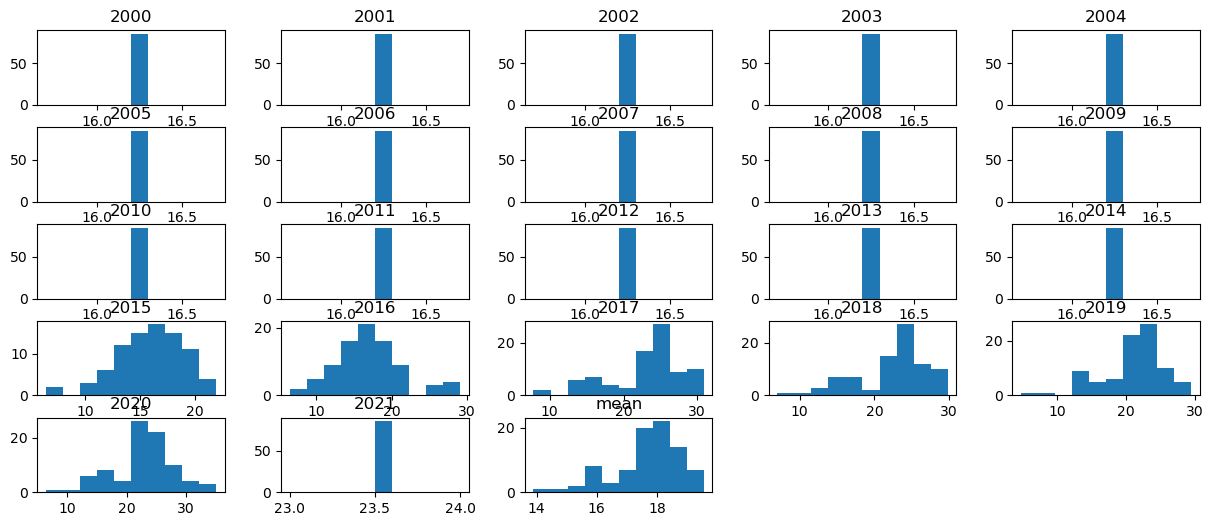

In [524]:
#Посмотрим на общую тенденцию:
df_welfare.hist(figsize = (15,6), grid = False);
plt.show()

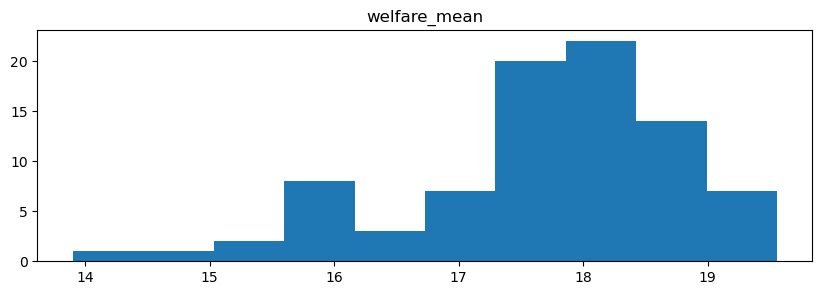

In [525]:
#Посмотрим на средние значения:
df_welfare_mean.hist(figsize = (10,3), grid = False);
plt.show()

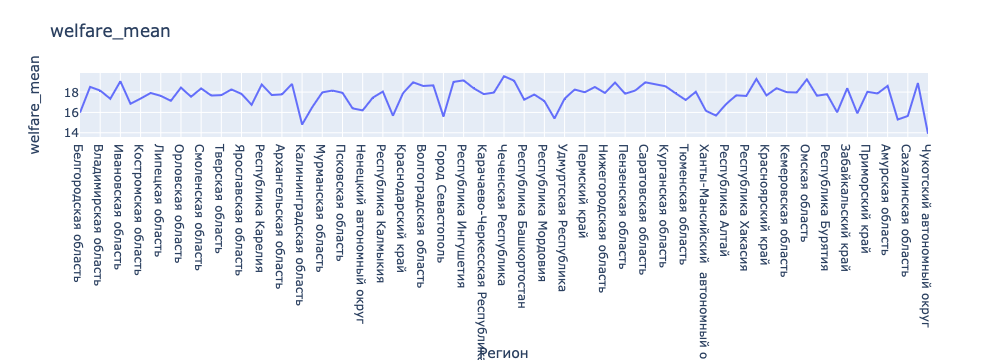

In [526]:
fig = px.line(df_welfare_mean, y='welfare_mean', width = 900, title = 'welfare_mean')
fig.show()

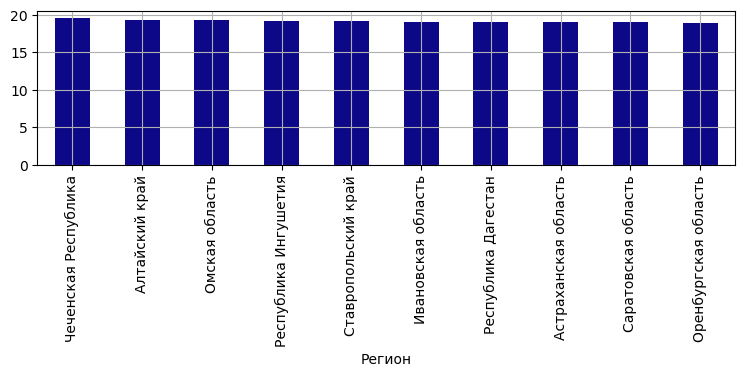

In [529]:
#визуализируем топ-10 регионов
grouped_df_welfare_mean = df_welfare_mean.groupby(['Регион'])['welfare_mean'].max()
grouped_df_welfare_mean = grouped_df_welfare_mean.nlargest(10)
grouped_df_welfare_mean.plot(
    kind='bar',
    grid=True,
    figsize=(9, 2),
    colormap='plasma'
);

In [530]:
#Посмотрим где больше всего
df_welfare_mean.loc[df_welfare_mean['welfare_mean'].idxmax()]

welfare_mean    19.56
Name: Чеченская Республика, dtype: float64

In [531]:
#посмотреть где меньше всего
df_welfare_mean.loc[df_welfare_mean['welfare_mean'].idxmin()]

welfare_mean    13.9
Name: Чукотский автономный округ, dtype: float64

In [532]:
#Среднее значение по всем регионам:
print(df_welfare_mean.mean().round(2))

welfare_mean    17.67
dtype: float64


In [533]:
#Сохраним данную таблицу для дальнейшей работы:
df_welfare_mean = df_welfare_mean.to_csv('data/total/df_welfare.csv', index=False)

**Вывод:** С каждым годом расходы на социальную политику возрастают. Явного лидера нет

### `7. Cреднедушевые и реальные денежные доходы населения, номинальная и реальная начисленная зарплата, по регионам`

In [535]:
cash = pd.read_excel('data/cash_real_income_wages_2015_2020.xlsx')
display(cash.head(3))

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,302541.0,30865.0,31897.0,33266.0,35338.0,36073.0
1,Центральный\n федеральный округ,38832.0,40200.0,41897.0,44009.0,47252.0,48226.0
2,Белгородская область,28043.0,29799.0,30342.0,30778.0,32352.0,32841.0


In [536]:
cash.rename(columns={'region':"Регион"}, inplace=True)
cash["Регион"] = cash["Регион"].str.strip()

In [537]:
cash_fed = cash[cash['Регион'].str.contains('федеральный округ|Федерация|в том числе:|район')].index
cash.drop(cash_fed, axis = 0, inplace=True)
cash['Регион'].nunique()

87

In [538]:
#Удалим Архангельскую и Тюменскую области:
cash_ar = cash[cash['Регион']== 'Архангельская область'].index
cash_tu = cash[cash['Регион']== 'Тюменская область'].index
cash.drop(cash_ar, axis = 0, inplace=True) 
cash.drop(cash_tu, axis = 0, inplace=True) 
#Посмотрим теперь на размерность:
cash.shape

(85, 7)

In [539]:
cash['Регион'] = cash['Регион'].apply(region_name)
cash['Регион'].nunique()

85

In [540]:
#Сделаем проверку на соответствие регионов:
cash['mask'] = cash['Регион'].apply(lambda x: 1 if x in region else 0)
print(len(cash['Регион'].unique()))
#print(cash['mask'])

85


In [541]:
cash = cash.drop(['mask'], axis=1)

In [542]:
#Сделаем столбец Регион индексом
cash["Регион"] = cash["Регион"].str.strip()
cash.set_index('Регион', inplace=True)

In [543]:
#Добавим недостающие года, заменив пустые значения медианой ближайшего года
cash[2000]=cash[2015].median()
cash[2001]=cash[2015].median()
cash[2002]=cash[2015].median()
cash[2003]=cash[2015].median()
cash[2004]=cash[2015].median()
cash[2005]=cash[2015].median()
cash[2006]=cash[2015].median()
cash[2007]=cash[2015].median()
cash[2008]=cash[2015].median()
cash[2009]=cash[2015].median()
cash[2010]=cash[2015].median()
cash[2011]=cash[2015].median()
cash[2012]=cash[2015].median()
cash[2013]=cash[2015].median()
cash[2014]=cash[2015].median()
cash[2021]=cash[2020].median()
cash= cash[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))]
cash.head(3)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,...,24991.0,24991.0,24991.0,28043.0,29799.0,30342.0,30778.0,32352.0,32841.0,28596.0
Брянская область,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,...,24991.0,24991.0,24991.0,23428.0,24006.0,25107.0,26585.0,28371.0,28596.0,28596.0
Владимирская область,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,24991.0,...,24991.0,24991.0,24991.0,22712.0,22365.0,23554.0,23539.0,25358.0,25922.0,28596.0


In [544]:
#Посмотрим на количество пропусков:
cash.isnull().sum().sum()

0

Создадим ДатаФрейм со средним значением c 2000 по 2021 год:

In [545]:
#Для начала создалим такой столбец:
cash['mean'] = cash[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [546]:
df_cash= cash[['mean']]
df_cash.rename(columns={'mean':"Денежные доходы населения"}, inplace=True)
df_cash.head(3)

,Денежные доходы населения
Регион,
Белгородская область,26709.82
Брянская область,25434.27
Владимирская область,24859.59


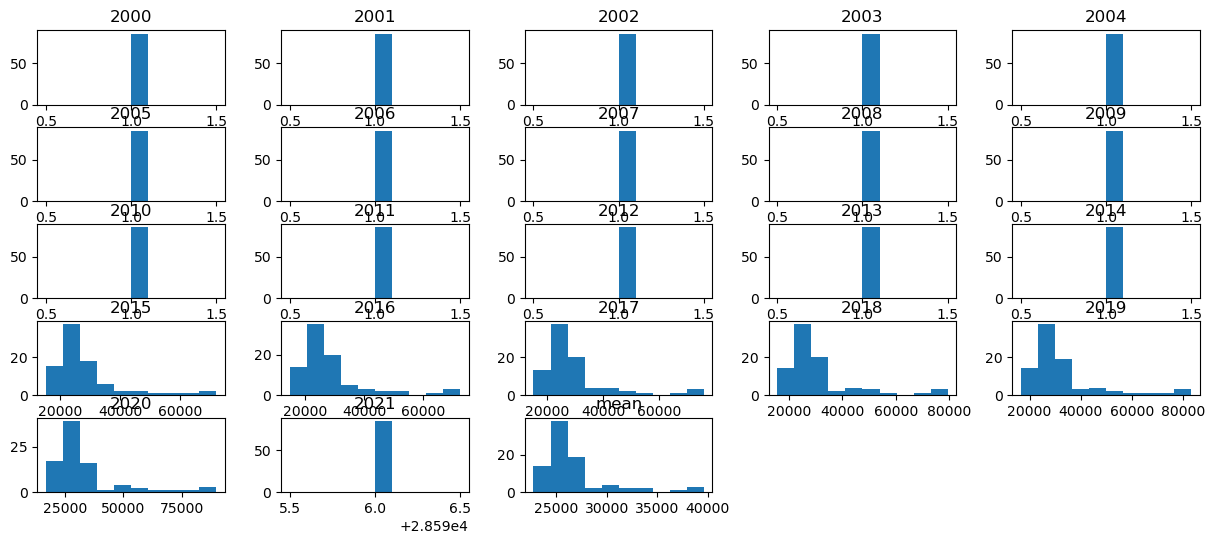

In [547]:
#Посмотрим на общую тенденцию:
cash.hist(figsize = (15,6), grid = False);
plt.show()

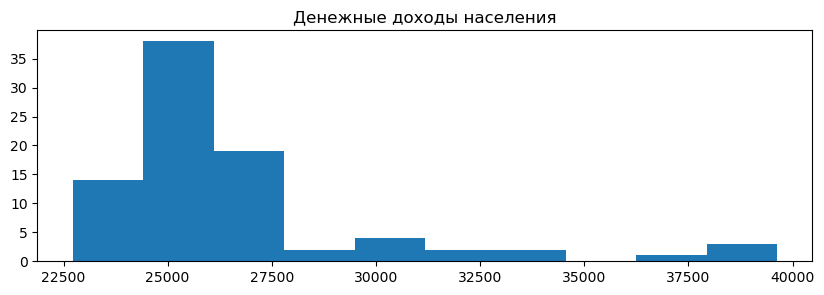

In [548]:
#Посмотрим на средние значения:
df_cash.hist(figsize = (10,3), grid = False);
plt.show()

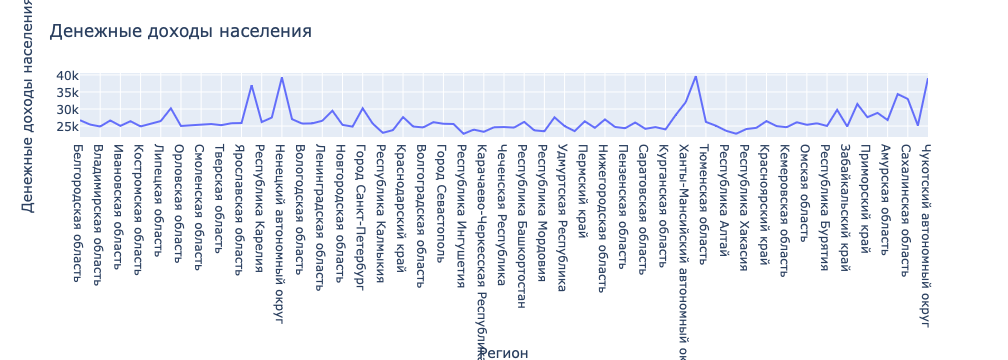

In [549]:
fig = px.line(df_cash, y='Денежные доходы населения', width = 900, title = 'Денежные доходы населения')
fig.show()

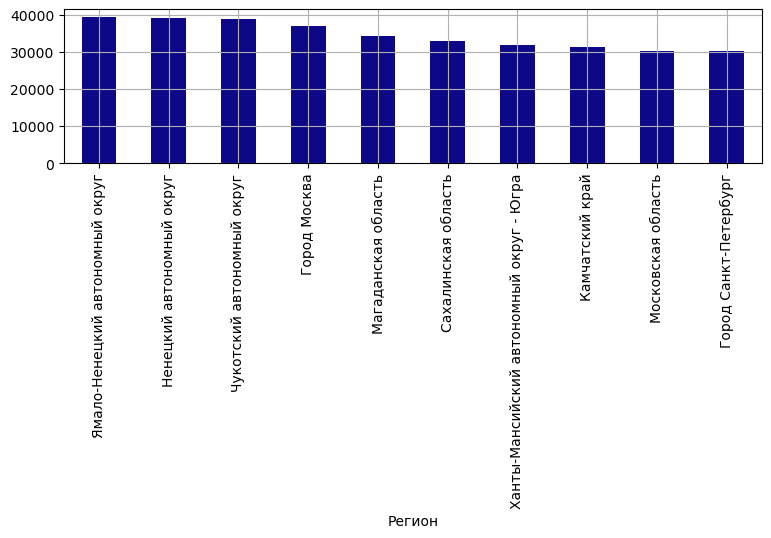

In [550]:
#визуализируем топ-10 регионов
grouped_df = df_cash.groupby(['Регион'])['Денежные доходы населения'].max()
grouped_df = grouped_df.nlargest(10)
grouped_df.plot(
    kind='bar',
    grid=True,
    figsize=(9, 2),
    colormap='plasma'
);

In [551]:
#Посмотрим где больше всего
df_cash.loc[df_cash['Денежные доходы населения'].idxmax()]

Денежные доходы населения    39631.09
Name: Ямало-Ненецкий автономный округ, dtype: float64

In [552]:
#посмотреть где меньше всего
df_cash.loc[df_cash['Денежные доходы населения'].idxmin()]

Денежные доходы населения    22720.27
Name: Республика Ингушетия, dtype: float64

In [553]:
#Среднее значение по всем регионам:
print(df_cash.mean().round(2))

Денежные доходы населения    26548.45
dtype: float64


In [554]:
#Сохраним данную таблицу для дальнейшей работы:
df_cash = df_cash.to_csv('data/total/df_cash.csv', index=False)

**Вывод:**
Средние доходы населения c 2015 года до 2020 года выросли на 16%, в то время как максимальные изменились почти на 20%.
Самые высокие доходы принадлежат Ямало_Ненецкому автономному округу ( в общем 468423), а самые маленькие-  Республике Ингушетия ( в общем 96385). Средние ежегодные доходы за все 6 находятся в пределах 30тр. 64 региона из 87 имеют доход ниже среднего уровня ( а это 74%)

### `8. Распределение малоимущего населения по социально-демографическим группам (дети, трудящиеся, пенсионеры) за 2017–2020 гг., по регионам.`

In [556]:
socdem_2017 = pd.read_excel('data/poverty_socdem_2017.xls', skiprows=2)
socdem_2018 = pd.read_excel('data/poverty_socdem_2018.xls', skiprows=2)
socdem_2019 = pd.read_excel('data/poverty_socdem_2019.xls', skiprows=2)
socdem_2020 = pd.read_excel('data/poverty_socdem_2020.xls', skiprows=2)
#display(socdem_2017.head())

Создадим функцию для преобразования во всех таблицах:

In [557]:
def clean_socdem(data_socdem):
    socdem_fed = data_socdem[data_socdem['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
    data_socdem.drop(socdem_fed, axis = 0, inplace=True)
    data_socdem.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
    data_socdem.rename(columns={'Дети в возрасте до 16 лет':"Дети"}, inplace=True)
    data_socdem.rename(columns={'Население старше трудоспособного возраста':"Пенсионеры"}, inplace=True)
    data_socdem.rename(columns={'Население трудоспособного возраста':"Трудящиеся"}, inplace=True) 
    data_socdem['Регион'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
    data_socdem['Регион'] = data_socdem['Регион'].apply(lambda x: ' '.join(x.split()))
    data_socdem_ar = data_socdem[data_socdem['Регион']== 'Архангельская область'].index
    data_socdem_tu = data_socdem[data_socdem['Регион']== 'Тюменская область'].index
    data_socdem.drop(data_socdem_ar, axis = 0, inplace=True) 
    data_socdem.drop(data_socdem_tu, axis = 0, inplace=True)
    data_socdem['Регион'] = data_socdem['Регион'].apply(region_name)
    return data_socdem

# применим функцию ко всем данным в таблицах:
list_df = [socdem_2017,socdem_2018,socdem_2019, socdem_2020]
for i in list_df:
    clean_socdem(i)
    i = i.fillna(0)
     
display(socdem_2017.head(3))

,Регион,Все население,Дети,Пенсионеры,Трудящиеся
1,Белгородская область,100,43.4,11.8,44.8
2,Брянская область,100,42.9,4.9,52.2
3,Владимирская область,100,34.8,8.6,56.6


In [558]:
#Сделаем проверку на соответствие регионов:
socdem_2017['mask'] = socdem_2017['Регион'].apply(lambda x: 1 if x in region else 0)
print(len(socdem_2017['Регион'].unique()))
#print(socdem_2017['mask'])

85


Хорошо, количество регионов у нас совпадает.

In [559]:
socdem_2017 = socdem_2017.drop(['mask'], axis=1)

In [560]:
#Сделаем столбец Регион индексом
socdem_2017["Регион"] = socdem_2017["Регион"].str.strip()
socdem_2017.set_index('Регион', inplace=True)

socdem_2018["Регион"] = socdem_2018["Регион"].str.strip()
socdem_2018.set_index('Регион', inplace=True)

socdem_2019["Регион"] = socdem_2019["Регион"].str.strip()
socdem_2019.set_index('Регион', inplace=True)

socdem_2020["Регион"] = socdem_2020["Регион"].str.strip()
socdem_2020.set_index('Регион', inplace=True)

Создадим новые таблицы и посмотрим на распределение этих категорий по годам:

Распределение малоимущего населения- `ДЕТИ`:

In [561]:
socdem_2017_deti = socdem_2017.loc[:, ['Дети']]
socdem_2018_deti = socdem_2018.loc[:, ['Дети']]
socdem_2019_deti = socdem_2019.loc[:, ['Дети']]
socdem_2020_deti = socdem_2020.loc[:, ['Дети']]

socdem_2017_deti.rename(columns={'Дети':2017},inplace=True)
socdem_2018_deti.rename(columns={'Дети':2018},inplace=True)
socdem_2019_deti.rename(columns={'Дети':2019},inplace=True)
socdem_2020_deti.rename(columns={'Дети':2020},inplace=True)

socdem_deti = socdem_2017_deti.merge(socdem_2018_deti,on='Регион',how='inner')
socdem_deti = socdem_deti.merge(socdem_2019_deti,on='Регион',how='inner')
socdem_deti = socdem_deti.merge(socdem_2020_deti,on='Регион',how='inner')

In [562]:
#Проверим количество пропусков:
socdem_deti.isnull().sum().sum()

12

In [563]:
#Заменим пропуски медианой во всей таблице:
for col in socdem_deti.columns:
    socdem_deti[col] = socdem_deti[col].fillna(socdem_deti[col].median())

In [564]:
#Добавим недостающие года, заменив пустые значения медианой ближайшего года
socdem_deti[2000]=socdem_deti[2017].median()
socdem_deti[2001]=socdem_deti[2017].median()
socdem_deti[2002]=socdem_deti[2017].median()
socdem_deti[2003]=socdem_deti[2017].median()
socdem_deti[2004]=socdem_deti[2017].median()
socdem_deti[2005]=socdem_deti[2017].median()
socdem_deti[2006]=socdem_deti[2017].median()
socdem_deti[2007]=socdem_deti[2017].median()
socdem_deti[2008]=socdem_deti[2017].median()
socdem_deti[2009]=socdem_deti[2017].median()
socdem_deti[2010]=socdem_deti[2017].median()
socdem_deti[2011]=socdem_deti[2017].median()
socdem_deti[2012]=socdem_deti[2017].median()
socdem_deti[2013]=socdem_deti[2017].median()
socdem_deti[2014]=socdem_deti[2017].median()
socdem_deti[2015]=socdem_deti[2017].median()
socdem_deti[2016]=socdem_deti[2017].median()
socdem_deti[2021]=socdem_deti[2020].median()
socdem_deti= socdem_deti[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))]
socdem_deti.head(3)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,38.4,38.4,38.4,38.4,38.4,38.4,38.4,38.4,38.4,38.4,...,38.4,38.4,38.4,38.4,38.4,43.4,44.8,0.0,39.3,39.3
Брянская область,38.4,38.4,38.4,38.4,38.4,38.4,38.4,38.4,38.4,38.4,...,38.4,38.4,38.4,38.4,38.4,42.9,40.3,37.5,44.8,39.3
Владимирская область,38.4,38.4,38.4,38.4,38.4,38.4,38.4,38.4,38.4,38.4,...,38.4,38.4,38.4,38.4,38.4,34.8,48.9,34.8,39.3,39.3


In [565]:
#Для начала создалим такой столбец:
socdem_deti['mean'] = socdem_deti[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [566]:
df_socdem_deti= socdem_deti[['mean']]
df_socdem_deti.rename(columns={'mean':"Малоимущие дети"}, inplace=True)
df_socdem_deti.head(3)

,Малоимущие дети
Регион,
Белгородская область,37.25
Брянская область,38.98
Владимирская область,38.63


In [ ]:
#Посмотрим на средние значения:
df_socdem_deti.hist(figsize = (10,3), grid = False);
plt.show()

In [ ]:
fig = px.line(df_socdem_deti, y='Малоимущие дети', width = 900, title = 'Малоимущие дети')
fig.show()

In [ ]:
#визуализируем топ-10 регионов
grouped_df_socdem_deti = df_socdem_deti.groupby(['Регион'])['Малоимущие дети'].max()
grouped_df_socdem_deti = grouped_df_socdem_deti.nlargest(10)
grouped_df_socdem_deti.plot(
    kind='bar',
    grid=True,
    figsize=(9, 2),
    colormap='plasma'
);

In [567]:
#Посмотрим где больше всего
df_socdem_deti.loc[df_socdem_deti['Малоимущие дети'].idxmax()]

Малоимущие дети    40.13
Name: Ямало-Ненецкий автономный округ, dtype: float64

In [568]:
#посмотреть где меньше всего
df_socdem_deti.loc[df_socdem_deti['Малоимущие дети'].idxmin()]

Малоимущие дети    35.54
Name: Ленинградская область, dtype: float64

In [569]:
#Среднее значение по всем регионам:
print(df_socdem_deti.mean().round(2))

Малоимущие дети    38.5
dtype: float64


In [570]:
#Сохраним данную таблицу для дальнейшей работы:
df_socdem_deti = df_socdem_deti.to_csv('data/total/df_socdem_deti.csv', index=False)

**Вывод: Самый большой % малоимущего насления группы ДЕТИ приходится на Ямало-Ненецкий автономный округ, и это странно, ведь  там достаточно большие доходы благодаря нефтенным компаниями и тд. Видимо для коренных жителей, которые живут никак не связанно с этой промышленностью достаточно большая часть. Меньше всего в Ленинградской области.**

Распределение малоимущего населения- `ТРУДЯЩИЕСЯ`:

In [571]:
socdem_2017_trud = socdem_2017.loc[:, ['Трудящиеся']]
socdem_2018_trud = socdem_2018.loc[:, ['Трудящиеся']]
socdem_2019_trud = socdem_2019.loc[:, ['Трудящиеся']]
socdem_2020_trud = socdem_2020.loc[:, ['Трудящиеся']]

socdem_2017_trud.rename(columns={'Трудящиеся':2017},inplace=True)
socdem_2018_trud.rename(columns={'Трудящиеся':2018},inplace=True)
socdem_2019_trud.rename(columns={'Трудящиеся':2019},inplace=True)
socdem_2020_trud.rename(columns={'Трудящиеся':2020},inplace=True)

socdem_trud = socdem_2017_trud.merge(socdem_2018_trud,on=['Регион'],how='left')
socdem_trud = socdem_trud.merge(socdem_2019_trud,on=['Регион'],how='left')
socdem_trud = socdem_trud.merge(socdem_2020_trud,on=['Регион'],how='left')

In [572]:
#Проверим количество пропусков:
socdem_trud.isnull().sum().sum()

12

In [573]:
#Заменим пропуски медианой во всей таблице:
for col in socdem_trud.columns:
    socdem_trud[col] = socdem_trud[col].fillna(socdem_trud[col].median())

In [574]:
#Добавим недостающие года, заменив пустые значения медианой ближайшего года
socdem_trud[2000]=socdem_trud[2017].median()
socdem_trud[2001]=socdem_trud[2017].median()
socdem_trud[2002]=socdem_trud[2017].median()
socdem_trud[2003]=socdem_trud[2017].median()
socdem_trud[2004]=socdem_trud[2017].median()
socdem_trud[2005]=socdem_trud[2017].median()
socdem_trud[2006]=socdem_trud[2017].median()
socdem_trud[2007]=socdem_trud[2017].median()
socdem_trud[2008]=socdem_trud[2017].median()
socdem_trud[2009]=socdem_trud[2017].median()
socdem_trud[2009]=socdem_trud[2017].median()
socdem_trud[2010]=socdem_trud[2017].median()
socdem_trud[2011]=socdem_trud[2017].median()
socdem_trud[2012]=socdem_trud[2017].median()
socdem_trud[2013]=socdem_trud[2017].median()
socdem_trud[2014]=socdem_trud[2017].median()
socdem_trud[2015]=socdem_trud[2017].median()
socdem_trud[2016]=socdem_trud[2017].median()
socdem_trud[2021]=socdem_trud[2020].median()
socdem_trud= socdem_trud[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))]

In [575]:
#Для начала создалим такой столбец:
socdem_trud['mean'] = socdem_trud[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [576]:
df_socdem_trud= socdem_trud[['mean']]
df_socdem_trud.rename(columns={'mean':"Малоимущие трудящиеся"}, inplace=True)
df_socdem_trud.head(3)

,Малоимущие трудящиеся
Регион,
Белгородская область,51.83
Брянская область,55.34
Владимирская область,55.13


In [ ]:
#Посмотрим на средние значения:
df_socdem_trud.hist(figsize = (10,3), grid = False);
plt.show()

In [ ]:
fig = px.line(df_socdem_trud, y='Малоимущие трудящиеся', width = 900, title = 'Малоимущие трудящиеся')
fig.show()

In [ ]:
#визуализируем топ-10 регионов
grouped_df_socdem_trud = df_socdem_trud.groupby(['Регион'])['Малоимущие трудящиеся'].max()
grouped_df_socdem_trud = grouped_df_socdem_trud.nlargest(10)
grouped_df_socdem_trud.plot(
    kind='bar',
    grid=True,
    figsize=(9, 2),
    colormap='plasma'
);

In [577]:
#Посмотрим где больше всего
df_socdem_trud.loc[df_socdem_trud['Малоимущие трудящиеся'].idxmax()]

Малоимущие трудящиеся    56.55
Name: Чувашская Республика, dtype: float64

In [578]:
#посмотреть где меньше всего
df_socdem_trud.loc[df_socdem_trud['Малоимущие трудящиеся'].idxmin()]

Малоимущие трудящиеся    51.83
Name: Белгородская область, dtype: float64

In [579]:
#Среднее значение по всем регионам:
print(df_socdem_trud.mean().round(2))

Малоимущие трудящиеся    55.13
dtype: float64


In [580]:
#Сохраним данную таблицу для дальнейшей работы:
df_socdem_trud = df_socdem_trud.to_csv('data/total/df_socdem_trud.csv', index=False)

**Вывод: Самый большой % малоимущего населения группы Трудящихся приходится на Чувашскую республику, а самый маленький на Белгородскую область и Чукотку(видимо там все хорошо зарабатывают из-за нефтедобывающей промышленности**

Распределение малоимущего населения- `ПЕНСИОНЕРЫ`:

In [581]:
socdem_2017_pens = socdem_2017.loc[:, ['Пенсионеры']]
socdem_2018_pens = socdem_2018.loc[:, ['Пенсионеры']]
socdem_2019_pens = socdem_2019.loc[:, ['Пенсионеры']]
socdem_2020_pens = socdem_2020.loc[:, ['Пенсионеры']]

socdem_2017_pens.rename(columns={'Пенсионеры':2017},inplace=True)
socdem_2018_pens.rename(columns={'Пенсионеры':2018},inplace=True)
socdem_2019_pens.rename(columns={'Пенсионеры':2019},inplace=True)
socdem_2020_pens.rename(columns={'Пенсионеры':2020},inplace=True)

socdem_pens = socdem_2017_pens.merge(socdem_2018_pens,on=['Регион'],how='left')
socdem_pens = socdem_pens.merge(socdem_2019_pens,on=['Регион'],how='left')
socdem_pens = socdem_pens.merge(socdem_2020_pens,on=['Регион'],how='left')

In [582]:
#Проверим количество пропусков:
socdem_pens.isnull().sum().sum()

12

In [583]:
#Заменим пропуски медианой во всей таблице:
for col in socdem_pens.columns:
    socdem_pens[col] = socdem_pens[col].fillna(socdem_pens[col].median())

In [584]:
#Добавим недостающие года, заменив пустые значения медианой ближайшего года
socdem_pens[2000]=socdem_pens[2017].median()
socdem_pens[2001]=socdem_pens[2017].median()
socdem_pens[2002]=socdem_pens[2017].median()
socdem_pens[2003]=socdem_pens[2017].median()
socdem_pens[2004]=socdem_pens[2017].median()
socdem_pens[2005]=socdem_pens[2017].median()
socdem_pens[2006]=socdem_pens[2017].median()
socdem_pens[2007]=socdem_pens[2017].median()
socdem_pens[2008]=socdem_pens[2017].median()
socdem_pens[2009]=socdem_pens[2017].median()
socdem_pens[2010]=socdem_pens[2017].median()
socdem_pens[2011]=socdem_pens[2017].median()
socdem_pens[2012]=socdem_pens[2017].median()
socdem_pens[2013]=socdem_pens[2017].median()
socdem_pens[2014]=socdem_pens[2017].median()
socdem_pens[2015]=socdem_pens[2017].median()
socdem_pens[2016]=socdem_pens[2017].median()
socdem_pens[2021]=socdem_pens[2020].median()
socdem_pens= socdem_pens[list((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018, 2019, 2020, 2021))]

In [585]:
#Для начала создалим такой столбец:
socdem_pens['mean'] = socdem_pens[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [586]:
df_socdem_pens= socdem_pens[['mean']]
df_socdem_pens.rename(columns={'mean':"Малоимущие пенсионеры"}, inplace=True)
df_socdem_pens.head(3)

,Малоимущие пенсионеры
Регион,
Белгородская область,6.50
Брянская область,5.86
Владимирская область,6.36


In [ ]:
#Посмотрим на средние значения:
df_socdem_pens.hist(figsize = (10,3), grid = False);
plt.show()

In [ ]:
fig = px.line(df_socdem_pens, y='Малоимущие пенсионеры', width = 900, title = 'Малоимущие пенсионеры')
fig.show()

In [ ]:
#визуализируем топ-10 регионов
grouped_df_socdem_pens = df_socdem_pens.groupby(['Регион'])['Малоимущие пенсионеры'].max()
grouped_df_socdem_pens = grouped_df_socdem_pens.nlargest(10)
grouped_df_socdem_pens.plot(
    kind='bar',
    grid=True,
    figsize=(9, 2),
    colormap='plasma'
);

In [587]:
#Посмотрим где больше всего
df_socdem_pens.loc[df_socdem_pens['Малоимущие пенсионеры'].idxmax()]

Малоимущие пенсионеры    7.15
Name: Кабардино-Балкарская Республика, dtype: float64

In [588]:
#посмотреть где меньше всего
df_socdem_pens.loc[df_socdem_pens['Малоимущие пенсионеры'].idxmin()]

Малоимущие пенсионеры    5.35
Name: Ямало-Ненецкий автономный округ, dtype: float64

In [589]:
#Среднее значение по всем регионам:
print(df_socdem_pens.mean().round(2))

Малоимущие пенсионеры    6.27
dtype: float64


In [590]:
#Сохраним данную таблицу для дальнейшей работы:
df_socdem_pens = df_socdem_pens.to_csv('data/total/df_socdem_pens.csv', index=False)

**Вывод: Самый большой % малоимущего населения категории Пенсионеры приходится на Кабардино-Балкарию, Смоленскую область и как ни странно город МоскваБ самый маленький % в Ямало-ненецком автономном округе.**

### `9. Характеристика жилищных условий домохозяйств. Оценка домохозяйствами состояния занимаемого ими жилого помещения, обследование 2020 года`

In [629]:
housing = pd.read_excel('data/housing_2020.xlsx')
display(housing.head(3))

,Регион,"Число домохозяйств, проживающих во всех типах жилых помещений","в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности","в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность","в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность",затруднились ответить,Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство
0,Российская Федерация,100.0,80.7,15.4,3.8,0.1,24.2,16.9,2.4
1,Центральный федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Белгородская область,100.0,86.3,11.7,2.0,0.0,25.1,17.8,2.6


In [630]:
#Преобразуем регионы:
housing_fed = housing[housing['Регион'].str.contains('федеральный округ|Федерация|район')].index
housing.drop(housing_fed, axis = 0, inplace=True)

In [631]:
housing['Регион'] = housing['Регион'].apply(region_name)
print(len(housing['Регион'].unique()))

85


In [632]:
#Отдельно придется написать функцию для смены одного региона:
regions_2={'Ненецкий авт. округ': 'Ненецкий автономный округ'}

def region_name2(name):
    for i in regions_2:
        if i in name:
            return regions_2[i]
    return name

In [633]:
housing['Регион'] = housing['Регион'].apply(region_name2)

In [634]:
#Сделаем проверку на соответствие регионов:
housing['mask'] = housing['Регион'].apply(lambda x: 1 if x in region else 0)
print(len(housing['Регион'].unique()))
#print(housing['mask'])
#sorted(housing['Регион'])

85


Отлично! Теперь количество регионов одинаковое

In [635]:
#Больше нам этот столбец не нужен:
housing = housing.drop(['mask'], axis=1)

In [636]:
#Сделаем столбец Регион индексом
housing['Регион'] = housing['Регион'].str.strip()
housing.set_index('Регион', inplace=True)

Из всех признаков для нас имеет наибольшую ценность только признак с жилой площадью:

In [637]:
housing_live = housing[['Размер жилой площади в расчете на члена домохозяйства']]

dif = list(set(housing_live.index).difference(set(housing.index)))
housing_live.drop(dif, axis = 0, inplace=True)
housing_live.head(3)

,Размер жилой площади в расчете на члена домохозяйства
Регион,
Белгородская область,17.8
Брянская область,24.1
Владимирская область,16.1


Т.к. у нас данные только за 1 год, нет смысла добавлять года и делать среднее.

In [638]:
#Посмотрим на количество пропусков:
housing_live.isnull().sum().sum()

0

In [ ]:
#Посмотрим на общую тенденцию:
housing_live.hist(figsize = (15,6), grid = False);
plt.show()

In [ ]:
fig = px.line(housing_live, y='Размер жилой площади в расчете на члена домохозяйства', width = 900, title = 'Размер жилой площади в расчете на члена домохозяйства')
fig.show()

In [ ]:
#визуализируем топ-10 регионов
grouped_housing_live = housing_live.groupby(['Регион'])['Размер жилой площади в расчете на члена домохозяйства'].max()
grouped_housing_live = grouped_housing_live.nlargest(10)
grouped_housing_live.plot(
    kind='bar',
    grid=True,
    figsize=(9, 2),
    colormap='plasma'
);

In [639]:
#Посмотрим где больше всего
housing_live.loc[housing_live['Размер жилой площади в расчете на члена домохозяйства'].idxmax()]

Размер жилой площади в расчете на члена домохозяйства    27.8
Name: Республика Ингушетия, dtype: float64

In [640]:
#посмотреть где меньше всего
housing_live.loc[housing_live['Размер жилой площади в расчете на члена домохозяйства'].idxmin()]

Размер жилой площади в расчете на члена домохозяйства    13.6
Name: Республика Тыва, dtype: float64

In [641]:
#Среднее значение по всем регионам:
print(housing_live.mean().round(2))

Размер жилой площади в расчете на члена домохозяйства    17.15
dtype: float64


In [642]:
#Сохраним данную таблицу для дальнейшей работы:
housing_live = housing_live.to_csv('data/total/df_housing_live.csv', index=False)

**Выводы: Мы располагем только данныеми за 2020 год, но предположим что это и будет наше среднее значение. самый большой размер жилой лощади (почти 28) приходится на Республику Ингушетия, меньше всего Республика Тыва.(13,6), Москва находится рядом (13,8)**

### `10. Численность населения по регионам и федеральным округам на 1 января каждого года за 1999–2022 гг.`

In [643]:
population = pd.read_excel('data/population.xlsx', skiprows=1)
display(population.head(3))

,Unnamed: 0,Unnamed: 1,январь 1999 г.,январь 2000 г.,январь 2001 г.,январь 2002 г.,январь 2003 г.,январь 2004 г.,январь 2005 г.,январь 2006 г.,...,январь 2013 г.,январь 2014 г.,январь 2015 г.,январь 2016 г.,январь 2017 г.,январь 2018 г.,январь 2019 г.,январь 2020 г.,январь 2021 г.,январь 2022 г.
0,все население,w2:p_mest:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Российская Федерация,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Раздел 1. Муниципальные образования субъектов ...,00000000000,147539426.0,146890128.0,146303611.0,145649334.0,144963650.0,144333586.0,143801046.0,143236582.0,...,143347059.0,143666931.0,146267288.0,146544710.0,146804372.0,146880432.0,146780720.0,146748590.0,146171015.0,145557576.0


In [644]:
population.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
population=population.drop(['Unnamed: 1'],axis=1)
population.shape

(368, 25)

Теперь необходимо преобразовать саму таблицу:

In [645]:
#Сдвинем все строки, чтобы данные соответствовали регионам
for i, val in enumerate(population['Регион']):
    if val == 'Раздел 1. Муниципальные образования субъектов Российской Федерации':
        population.loc[i, 'Регион'] = population.loc[i-1, 'Регион']
population.dropna(subset=population.columns[1:], how='all', inplace=True)

In [646]:
#Преобразуем регионы
population_fed = population[population['Регион'].str.contains('федеральный округ|Федерация|район|сельсовет|все|поссовет|образования|пункты|Агинский|Коми-Пермяцкий|Корякский|Таймырский|Усть-Ордынский|Эвенкийский|рп Благовещенка|рп Степное Озеро')].index
population.drop(population_fed, axis = 0, inplace=True)

In [647]:
#Удалим Архангельскую и Тюменскую области:
population_ar = population[population['Регион']== 'Архангельская область'].index
population_tu = population[population['Регион']== 'Тюменская область'].index
population.drop(population_ar, axis = 0, inplace=True) 
population.drop(population_tu, axis = 0, inplace=True) 

In [648]:
#Применим нашу функцию:
population['Регион'] = population['Регион'].apply(region_name)
print(len(population['Регион'].unique()))

85


In [649]:
#Сделаем проверку на соответствие регионов:
population['mask'] = population['Регион'].apply(lambda x: 1 if x in region else 0)
#print(population['mask'])

In [650]:
#Больше нам этот столбец не нужен:
population = population.drop(['mask'], axis=1)

Все регионы и количество соответствуют нашему списку

In [651]:
#Сделаем столбец Регион индексом
population["Регион"] = population["Регион"].str.strip()
population.set_index('Регион', inplace=True)

Для дальнейшего удобства переименуем столбцы с датами, Т.к. все данные приходятся на 1 января, значит это данные за преыдыдущий год:

In [652]:
population.rename(columns={'январь 1999 г.': 1998}, inplace=True)
population.rename(columns={'январь 2000 г.': 1999}, inplace=True)
population.rename(columns={'январь 2001 г.': 2000}, inplace=True)
population.rename(columns={'январь 2002 г.': 2001}, inplace=True)
population.rename(columns={'январь 2003 г.': 2002}, inplace=True)
population.rename(columns={'январь 2004 г.': 2003}, inplace=True)
population.rename(columns={'январь 2005 г.': 2004}, inplace=True)
population.rename(columns={'январь 2006 г.': 2005}, inplace=True)
population.rename(columns={'январь 2007 г.': 2006}, inplace=True)
population.rename(columns={'январь 2008 г.': 2007}, inplace=True)
population.rename(columns={'январь 2009 г.': 2008}, inplace=True)
population.rename(columns={'январь 2010 г.': 2009}, inplace=True)
population.rename(columns={'январь 2011 г.': 2010}, inplace=True)
population.rename(columns={'январь 2012 г.': 2011}, inplace=True)
population.rename(columns={'январь 2013 г.': 2012}, inplace=True)
population.rename(columns={'январь 2014 г.': 2013}, inplace=True)
population.rename(columns={'январь 2015 г.': 2014}, inplace=True)
population.rename(columns={'январь 2016 г.': 2015}, inplace=True)
population.rename(columns={'январь 2017 г.': 2016}, inplace=True)
population.rename(columns={'январь 2018 г.': 2017}, inplace=True)
population.rename(columns={'январь 2019 г.': 2018}, inplace=True)
population.rename(columns={'январь 2020 г.': 2019}, inplace=True)
population.rename(columns={'январь 2021 г.': 2020}, inplace=True)
population.rename(columns={'январь 2022 г.': 2021}, inplace=True)

In [653]:
#Удалим лишние года:
population = population.drop(columns=[1998, 1999]) 
population.head(3)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,1506976.0,1508137.0,1511899.0,1513860.0,1511662.0,1511715.0,1514153.0,1520102.0,1526258.0,1531781.0,...,1540985.0,1544108.0,1547936.0,1550137.0,1552865.0,1549876.0,1547418.0,1549151.0,1541259.0,1531917.0
Брянская область,1407965.0,1391430.0,1375004.0,1360249.0,1344132.0,1327652.0,1312748.0,1303343.0,1294251.0,1286540.0,...,1253666.0,1242599.0,1232940.0,1225741.0,1220530.0,1210982.0,1200187.0,1192491.0,1182682.0,1168771.0
Владимирская область,1558052.0,1539179.0,1520057.0,1509571.0,1497598.0,1486453.0,1475861.0,1466743.0,1457937.0,1449773.0,...,1421742.0,1413321.0,1405613.0,1397168.0,1389599.0,1378337.0,1365805.0,1358416.0,1342099.0,1323659.0


In [654]:
#Посмотрим на количество пропусков:
population.isnull().sum().sum()

34

In [655]:
#Заменим пропуски медианой во всей таблице:
for col in population.columns:
    population[col] = population[col].fillna(population[col].median())

Создадим ДатаФрейм со средним значением c 2000 по 2021 год:

In [656]:
#Для начала создалим такой столбец:
population['mean'] = population[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                   2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]].mean(axis=1).round(2)

In [657]:
df_population= population[['mean']]
df_population.rename(columns={'mean':"Численность населения"}, inplace=True)
df_population.head(3)

,Численность населения
Регион,
Белгородская область,1530937.32
Брянская область,1276076.05
Владимирская область,1437729.27


In [ ]:
#Посмотрим на общую тенденцию:
population.hist(figsize = (15,6), grid = False);
plt.show()

In [ ]:
#Посмотрим на средние значения:
df_population.hist(figsize = (10,3), grid = False);
plt.show()

In [ ]:
fig = px.line(df_population, y='Численность населения', width = 900, title = 'Численность населения')
fig.show()

In [ ]:
#визуализируем топ-10 регионов
grouped_df_population = df_population.groupby(['Регион'])['Численность населения'].max()
grouped_df_population = grouped_df_population.nlargest(10)
grouped_df_population.plot(
    kind='bar',
    grid=True,
    figsize=(9, 2),
    colormap='plasma'
);

In [658]:
#Посмотрим где больше всего
df_population.loc[df_population['Численность населения'].idxmax()]

Численность населения    11619036.59
Name: Город Москва, dtype: float64

In [659]:
#посмотреть где меньше всего
df_population.loc[df_population['Численность населения'].idxmin()]

Численность населения    42696.45
Name: Ненецкий автономный округ, dtype: float64

In [660]:
#Среднее значение по всем регионам:
print(df_population.mean().round(2))

Численность населения    1720844.72
dtype: float64


In [661]:
#Сохраним данную таблицу для дальнейшей работы:
df_population = df_population.to_csv('data/total/df_population.csv', index=False)

**Вывод: Лидером конечно же является Москва, несмотря на то что среднее значение за 20 лет сильно отличается от сегодняшней ситуации. Меньше всего в Ненецком автономном округе**

### ` 11. Валовой региональный продукт на душу населения, в рублях.`

In [662]:
grp = pd.read_excel('data/gross_regional_product_1996_2020.xls', skiprows=2)
display(grp.head(3))

,Unnamed: 0,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Российская Федерация,12225.0,13938.4,15371.1,26200.6,39532.3,49474.8,60611.4,74840.5,97691.9,...,317515.3,348641.5,377006.0,405147.7,449097.9,505337.7,543065.9,614333.2,646144.1,640519.0
1,Центральный федеральный округ,NaN,NaN,16564.4,31118.7,48205.0,58851.5,75739.2,94244.6,121487.7,...,417288.1,451517.2,494482.7,536607.9,580706.6,663881.8,711031.6,792780.9,835858.8,854978.5
2,Белгородская область,9575.6,10792.2,12242.8,21398.0,27969.5,33126.7,41327.4,50271.4,75629.4,...,331010.0,354570.6,368874.8,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0


In [666]:
grp.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
grp['Регион'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
grp['Регион'] = grp['Регион'].apply(lambda x: ' '.join(x.split()))
grp_fed = grp[grp['Регион'].str.contains('федеральный округ|Федерация|район')].index
grp.drop(grp_fed, axis = 0, inplace=True)
grp_ar = grp[grp['Регион']== 'Архангельская область'].index
grp_tu = grp[grp['Регион']== 'Тюменская область'].index
grp.drop(grp_ar, axis = 0, inplace=True) 
grp.drop(grp_tu, axis = 0, inplace=True) 
#Посмотрим теперь на размерность:
print(len(grp['Регион'].unique()))
#sorted(grp['Регион'])

85


In [667]:
#Применим нашу функцию:
grp['Регион'] = grp['Регион'].apply(region_name)

In [670]:
#Сделаем проверку на соответствие регионов:
grp['mask'] = grp['Регион'].apply(lambda x: 1 if x in region else 0)
print(len(grp['Регион'].unique()))
#print(grp['mask'])

85


Хорошо, количество регионов и названия у нас совпадает.

In [671]:
#Больше нам этот столбец не нужен:
grp = grp.drop(['mask'], axis=1)

In [677]:
#Сделаем столбец Регион индексом
grp["Регион"] = grp["Регион"].str.strip()
grp.set_index('Регион', inplace=True)

In [672]:
#Удалим лишние года:
grp = grp.drop(columns=['1996', '1997', '1998', '1999']) 

KeyError: 2020

In [673]:
#И добавим недостающий год:
grp['2021']=grp['2020'].median()

In [674]:
#Посмотрим на количество пропусков:
grp.isnull().sum().sum()

0

Создадим ДатаФрейм со средним значением c 2000 по 2021 год:

In [675]:
grp['mean'] = grp[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
                               '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
                               '2016', '2017', '2018', '2019', '2020', '2021']].mean(axis=1).round(2)

In [679]:
df_grp= grp[['mean']]
df_grp.rename(columns={'mean':"Валовой региональный продукт"}, inplace=True)
df_grp.head(3)

,Валовой региональный продукт
Регион,
Белгородская область,296532.88
Брянская область,159780.83
Владимирская область,188789.51


Посмотрим на данные визуально:

In [ ]:
#Посмотрим сначала на общую тенденцию:
grp.hist(figsize = (10,3), grid = False);
plt.show()

In [ ]:
#Посмотрим на средние значения:
df_grp.hist(figsize = (10,3), grid = False);
plt.show()

In [ ]:
fig = px.line(df_grp, y='Валовой региональный продукт', width = 900, title = 'Валовой региональный продукт')
fig.show()

In [ ]:
grouped_df_grp = df_grp.groupby(['Регион'])['Валовой региональный продукт'].max()
grouped_df_grp = grouped_df_grp.nlargest(10)
grouped_df_grp.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [680]:
#Посмотрим где больше всего
df_grp.loc[df_grp['Валовой региональный продукт'].idxmax()]

Валовой региональный продукт    2439921.05
Name: Ненецкий автономный округ, dtype: float64

In [681]:
#посмотреть где меньше всего
df_grp.loc[df_grp['Валовой региональный продукт'].idxmin()]

Валовой региональный продукт    83488.91
Name: Республика Крым, dtype: float64

In [682]:
#Среднее значение по всем регионам:
print(df_grp.mean().round(2))

Валовой региональный продукт    300310.52
dtype: float64


In [683]:
grp_mean=df_grp.mean().round(2)

Валовой региональный продукт    300310.52
dtype: float64

Посмотрим скольбко всего регионов имеют Валовой Региональный продукт выше среднего уровня:

In [754]:
grp_mean2 = df_grp['Регион'].mean()

KeyError: 'Регион'

In [688]:
display(len(df_grp[df_grp['Валовой региональный продукт']>grp_mean2].Регион))

85

Посмотрим подробнее:

**Вывод: За годы Валовой Региональный продукт вырос в 60 раз. Самый большой в 2020 году был в Ненецком автономном округе, а самый маленький в Республике Ингушетия. В 2020 году выше среднего значения находтся 17 регионов!!! Главные причины такого превышения заключаются в наличии на территории этих регионов крупнейшего производства нефтегазовых ресурсов, обеспечивающего высокие доходы. Известно, что валовой региональный продукт (валовая добавленная стоимость) включает прибыль организаций, заработную плату наемных работников, предпринимательские доходы, поступления в амортизационные фонды организаций, доходы государства в виде налогов. Поэтому Москва и Санкт-Петербург занимают там первые строки**

### `12. Объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами, по видам деятельности за 2005–2016 гг., 2017–2020 гг. (в тысячах рублей, значение показателя за год, полный круг).`

In [762]:
reg_prod__2005_2016 = pd.read_csv('data/regional_production_2005_2016.csv')
display(reg_prod__2005_2016.head(3))

,region,production_field,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,3.062460e+09,3.720887e+09,4.488915e+09,5.271733e+09,5.090973e+09,6.217952e+09,8.020217e+09,8.950066e+09,9.213745e+09,9.690978e+09,1.125954e+10,1.173050e+10
1,Российская Федерация,Подраздел СА ДОБЫЧА ТОПЛИВНО-ЭНЕРГЕТИЧЕСКИ...,2.686256e+09,3.292691e+09,3.983633e+09,4.650669e+09,4.537654e+09,5.470740e+09,7.032308e+09,7.921745e+09,8.160342e+09,8.563862e+09,9.896535e+09,1.016955e+10
2,Российская Федерация,"Добыча каменного угля,бурого угля и торфа",2.321794e+08,2.264506e+08,2.862991e+08,4.414241e+08,3.485582e+08,5.089025e+08,6.663161e+08,6.514620e+08,6.003871e+08,6.222425e+08,7.721283e+08,9.090367e+08


In [763]:
#Переименуем столбец с регионами и уберем в нем лишние символы
reg_prod__2005_2016.rename(columns={'region':"Регион"}, inplace=True)
reg_prod__2005_2016["Регион"] = reg_prod__2005_2016["Регион"].str.strip()
reg_prod__2005_2016['Регион'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
reg_prod__2005_2016['Регион'] = reg_prod__2005_2016['Регион'].apply(lambda x: ' '.join(x.split()))
display(len(reg_prod__2005_2016['Регион']))

929

In [764]:
#sorted(reg_prod__2005_2016['Регион'])

In [765]:
#Преобразуем регионы:
reg_prod__2005_2016_fed = reg_prod__2005_2016[reg_prod__2005_2016['Регион'].str.contains('федеральный округ|Федерация|район|Агинский|границах|Коми-Пермяцкий|Корякский|Таймырский|Усть-Ордынский|Эвенкийский')].index
reg_prod__2005_2016.drop(reg_prod__2005_2016_fed, axis = 0, inplace=True)   
#Удалим Архангельскую и Тюменскую области:
reg_prod__2005_2016_ar = reg_prod__2005_2016[reg_prod__2005_2016['Регион']== 'Архангельская область'].index
reg_prod__2005_2016_tu = reg_prod__2005_2016[reg_prod__2005_2016['Регион']== 'Тюменская область'].index
reg_prod__2005_2016.drop(reg_prod__2005_2016_ar, axis = 0, inplace=True) 
reg_prod__2005_2016.drop(reg_prod__2005_2016_tu, axis = 0, inplace=True) 
#Посмотрим теперь на размерность:
reg_prod__2005_2016.shape

(261, 14)

In [766]:
#Применим нашу функцию:
reg_prod__2005_2016['Регион'] = reg_prod__2005_2016['Регион'].apply(region_name)

In [767]:
#Сделаем проверку на соответствие регионов:
reg_prod__2005_2016['mask'] = reg_prod__2005_2016['Регион'].apply(lambda x: 1 if x in region else 0)
print(len(reg_prod__2005_2016['Регион'].unique()))
#print(reg_prod__2005_2016['mask'])

85


Хорошо, количество регионов и названия у нас совпадает.

In [768]:
#Больше нам этот столбец не нужен:
reg_prod__2005_2016 = reg_prod__2005_2016.drop(['mask'], axis=1)

Теперь посмотрим на виды производства:

In [769]:
#Переименуем столбец с регионами и уберем в нем лишние символы
reg_prod__2005_2016.rename(columns={'production_field':"Производство"}, inplace=True)
reg_prod__2005_2016["Производство"] = reg_prod__2005_2016["Производство"].str.strip()
reg_prod__2005_2016['Производство'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
#reg_prod__2005_2016['Производство'] = reg_prod__2005_2016['Производство'].apply(lambda x: ' '.join(x.split()))
display(len(reg_prod__2005_2016['Производство']))
print(len(reg_prod__2005_2016['Производство'].unique()))
#sorted(reg_prod__2005_2016['Производство'])

261

3


Как мы выяснили у нас 3 главные категории производства :
- 'РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ',
- 'РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭНЕРГИИ, ГАЗА И ВОДЫ',
- 'РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА'

Мы создадим отдельных 3 таблицы по видам производства:

In [770]:
reg_prod__2005_2016['mean'] = reg_prod__2005_2016[['2005', '2006', '2007',
                               '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
                               '2016']].mean(axis=1).round(2)

In [771]:
#Сделаем столбец Регион индексом
reg_prod__2005_2016["Регион"] = reg_prod__2005_2016["Регион"].str.strip()
reg_prod__2005_2016.set_index('Регион', inplace=True)

In [772]:
reg_prod_total1 = reg_prod__2005_2016[reg_prod__2005_2016['Производство'].isin(['РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ',\
    'РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭНЕРГИИ, ГАЗА И ВОДЫ','РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА' ])].loc[:,['mean','Производство']]
reg_prod_total1 = reg_prod_total1.dropna(axis=0)
reg_prod_total1 = reg_prod_total1.groupby(['Регион','Производство'])['mean'].sum().unstack()

print(reg_prod_total1.shape)
display(reg_prod_total1.head(2))

(85, 3)


Производство,РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,"РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭНЕРГИИ, ГАЗА И ВОДЫ",РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ
Регион,,,
Алтайский край,1.711406e+08,31793397.49,3823042.68
Амурская область,1.899645e+07,24265150.99,36611490.94


In [773]:
reg_prod_total1['Всего'] = reg_prod_total1[['РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ',
    'РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭНЕРГИИ, ГАЗА И ВОДЫ','РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА']].sum(axis=1)

In [774]:
display(reg_prod_total1.head(3))

Производство,РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,"РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭНЕРГИИ, ГАЗА И ВОДЫ",РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,Всего
Регион,,,,
Алтайский край,1.711406e+08,31793397.49,3823042.68,2.067570e+08
Амурская область,1.899645e+07,24265150.99,36611490.94,7.987309e+07
Архангельская область,2.991541e+08,62696917.69,28571107.35,3.904222e+08


Оставим за 2005_2016 год 3 таблицы:
- Всего,
- Добыча полезных ископаемых,
- Обрабатывающие производства

In [775]:
reg_prod_total1.rename(columns={'РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ':"Добыча полезных ископаемых"}, inplace=True)
reg_prod_total1.rename(columns={'РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА':"Обрабатывающие производства"}, inplace=True)

In [776]:
df_reg_prod_05_16_total = reg_prod_total1[['Всего']]
df_reg_prod_05_16_manufactor = reg_prod_total1[['Обрабатывающие производства']]
df_reg_prod_05_16_mining = reg_prod_total1[['Добыча полезных ископаемых']]
df_reg_prod_05_16_mining.head(3)

Производство,Добыча полезных ископаемых
Регион,
Алтайский край,3823042.68
Амурская область,36611490.94
Архангельская область,28571107.35


Теперь откроем таблицу за 2017-2020 года:

In [777]:
reg_prod__2017_2020 = pd.read_csv('data/regional_production_2017_2020.csv')
display(reg_prod__2017_2020.head(3))

,region,production_field,2017,2018,2019,2020
0,Российская Федерация,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,1.391616e+10,1.819387e+10,1.832413e+10,1.449890e+10
1,Российская Федерация,Добыча угля,1.228407e+09,1.567151e+09,1.392654e+09,1.100662e+09
2,Российская Федерация,Добыча и обогащение угля и антрацита,1.151523e+09,1.472893e+09,1.302804e+09,1.012754e+09


In [778]:
#Переименуем столбец с регионами и уберем в нем лишние символы
reg_prod__2017_2020.rename(columns={'region':"Регион"}, inplace=True)
reg_prod__2017_2020["Регион"] = reg_prod__2017_2020["Регион"].str.strip()
reg_prod__2017_2020['Регион'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
reg_prod__2017_2020['Регион'] = reg_prod__2017_2020['Регион'].apply(lambda x: ' '.join(x.split()))
display(len(reg_prod__2017_2020['Регион']))

604

In [779]:
#Преобразуем регионы:
reg_prod__2017_2020_fed = reg_prod__2017_2020[reg_prod__2017_2020['Регион'].str.contains('федеральный округ|Федерация|район|Агинский|границах|Коми-Пермяцкий|Корякский|Таймырский|Усть-Ордынский|Эвенкийский')].index
reg_prod__2017_2020.drop(reg_prod__2017_2020_fed, axis = 0, inplace=True)   
#Удалим Архангельскую и Тюменскую области:
reg_prod__2017_2020_ar = reg_prod__2017_2020[reg_prod__2017_2020['Регион']== 'Архангельская область'].index
reg_prod__2017_2020_tu = reg_prod__2017_2020[reg_prod__2017_2020['Регион']== 'Тюменская область'].index
reg_prod__2017_2020.drop(reg_prod__2017_2020_ar, axis = 0, inplace=True) 
reg_prod__2017_2020.drop(reg_prod__2017_2020_tu, axis = 0, inplace=True) 
#Посмотрим теперь на размерность:
reg_prod__2017_2020.shape

(421, 6)

In [780]:
#Применим нашу функцию:
reg_prod__2017_2020['Регион'] = reg_prod__2017_2020['Регион'].apply(region_name)

In [781]:
#Сделаем проверку на соответствие регионов:
reg_prod__2017_2020['mask'] = reg_prod__2017_2020['Регион'].apply(lambda x: 1 if x in region else 0)
print(len(reg_prod__2017_2020['Регион'].unique()))
#print(reg_prod__2017_2020['mask'])

85


Хорошо, количество регионов и названия у нас совпадает.

In [782]:
#Больше нам этот столбец не нужен:
reg_prod__2017_2020 = reg_prod__2017_2020.drop(['mask'], axis=1)

In [783]:
#sorted(reg_prod__2017_2020['production_field'])

А тут у нас 5 различных  производств :
- 'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',
- 'ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ',
- 'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА',
- 'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА',
- 'Промышленное производство (промышленность)'

In [784]:
#Переименуем столбец с регионами и уберем в нем лишние символы
reg_prod__2017_2020.rename(columns={'production_field':"Производство"}, inplace=True)
reg_prod__2017_2020["Производство"] = reg_prod__2017_2020["Производство"].str.strip()
reg_prod__2017_2020['Производство'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
#reg_prod__2017_2020['Производство'] = reg_prod__2005_2016['Производство'].apply(lambda x: ' '.join(x.split()))
display(len(reg_prod__2017_2020['Производство']))
print(len(reg_prod__2017_2020['Производство'].unique()))
#sorted(reg_prod__2017_2020['Производство'])

421

5


Сделаем также 3 отдельных таблицы из текущих признаков:`'ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ'`, `'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА'`, `'ВСЕГО'`:

In [785]:
reg_prod__2017_2020['mean'] = reg_prod__2017_2020[['2017', '2018', '2019', '2020']].mean(axis=1).round(2)

In [786]:
#Сделаем столбец Регион индексом
reg_prod__2017_2020["Регион"] = reg_prod__2017_2020["Регион"].str.strip()
reg_prod__2017_2020.set_index('Регион', inplace=True)

In [787]:
reg_prod_total = reg_prod__2017_2020[reg_prod__2017_2020['Производство'].isin(['ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',\
    'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА','ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ', 'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА', 'Промышленное производство (промышленность)' ])].loc[:,['mean','Производство']]
reg_prod_total = reg_prod_total.dropna(axis=0)
reg_prod_total = reg_prod_total.groupby(['Регион','Производство'])['mean'].sum().unstack()

print(reg_prod_total.shape)
display(reg_prod_total.head())

(85, 5)


Производство,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ",ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА",ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Промышленное производство (промышленность)
Регион,,,,,
Алтайский край,9664880.38,7.014633e+06,45471965.17,3.375898e+08,3.997413e+08
Амурская область,3183552.82,8.093927e+07,40325051.67,3.582815e+07,1.602760e+08
Архангельская область,5585370.30,3.116501e+07,33846746.81,2.435495e+08,3.141466e+08
Астраханская область,5713025.80,2.904989e+08,28662224.70,6.718197e+07,3.920561e+08
Белгородская область,10532428.48,1.584114e+08,26791541.65,7.022505e+08,8.979858e+08


In [788]:
reg_prod_total['Всего'] = reg_prod_total[['ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',
    'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА','ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ', 'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА', 'Промышленное производство (промышленность)']].sum(axis=1)

In [789]:
display(reg_prod_total.head(3))

Производство,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ",ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА",ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Промышленное производство (промышленность),Всего
Регион,,,,,,
Алтайский край,9664880.38,7014632.82,45471965.17,3.375898e+08,3.997413e+08,7.994826e+08
Амурская область,3183552.82,80939265.32,40325051.67,3.582815e+07,1.602760e+08,3.205520e+08
Архангельская область,5585370.30,31165007.90,33846746.81,2.435495e+08,3.141466e+08,6.282932e+08


Оставим за 2017_2020 год 3 таблицы:
- Всего,
- Добыча полезных ископаемых,
- Обрабатывающие производства

In [791]:
reg_prod_total.rename(columns={'ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ':"Добыча полезных ископаемых"}, inplace=True)
reg_prod_total.rename(columns={'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА':"Обрабатывающие производства"}, inplace=True)

In [792]:
df_reg_prod_17_20_total = reg_prod_total[['Всего']]
df_reg_prod_17_20_manufactor = reg_prod_total[['Обрабатывающие производства']]
df_reg_prod_17_20_mining = reg_prod_total[['Добыча полезных ископаемых']]
df_reg_prod_17_20_mining.head(3)

Производство,Добыча полезных ископаемых
Регион,
Алтайский край,7014632.82
Амурская область,80939265.32
Архангельская область,31165007.90


Теперь соединим все наши таблицы:

In [794]:
df_reg_prod_total = df_reg_prod_17_20_total.merge(df_reg_prod_05_16_total,on='Регион',how='inner')
df_reg_prod_manufactor = df_reg_prod_17_20_manufactor.merge(df_reg_prod_05_16_manufactor,on='Регион',how='inner')
df_reg_prod_mining = df_reg_prod_17_20_mining.merge(df_reg_prod_05_16_mining,on='Регион',how='inner')
df_reg_prod_mining.head(3)

Производство,Добыча полезных ископаемых_x,Добыча полезных ископаемых_y
Регион,,
Алтайский край,7014632.82,3823042.68
Амурская область,80939265.32,36611490.94
Архангельская область,31165007.90,28571107.35


Возьмем среднее значение за 2005-2016 и 2017-2020 год и оставим один столбец во всех таблицах:

In [795]:
df_reg_prod_total
df_reg_prod_total['mean'] = df_reg_prod_total[['Всего_x', 'Всего_y']].mean(axis=1).round(2)
df_reg_prod_total = df_reg_prod_total[['mean']]
df_reg_prod_total.rename(columns={'mean':"Все производства"}, inplace=True)

df_reg_prod_manufactor
df_reg_prod_manufactor['mean'] = df_reg_prod_manufactor[['Обрабатывающие производства_x', 'Обрабатывающие производства_y']].mean(axis=1).round(2)
df_reg_prod_manufactor = df_reg_prod_manufactor[['mean']]
df_reg_prod_manufactor.rename(columns={'mean':"Обрабатывающие производства"}, inplace=True)

df_reg_prod_mining
df_reg_prod_mining['mean'] = df_reg_prod_mining[['Добыча полезных ископаемых_x', 'Добыча полезных ископаемых_y']].mean(axis=1).round(2)
df_reg_prod_mining = df_reg_prod_mining[['mean']]
df_reg_prod_mining.rename(columns={'mean':"Добыча полезных ископаемых"}, inplace=True)

df_reg_prod_mining.head(3)

Производство,Добыча полезных ископаемых
Регион,
Алтайский край,5418837.75
Амурская область,58775378.13
Архангельская область,29868057.62


In [796]:
#Проверим пропуски:
df_reg_prod_mining.isnull().sum().sum()
df_reg_prod_manufactor.isnull().sum().sum()
df_reg_prod_total.isnull().sum().sum()

0

Визуализируем наши данные:

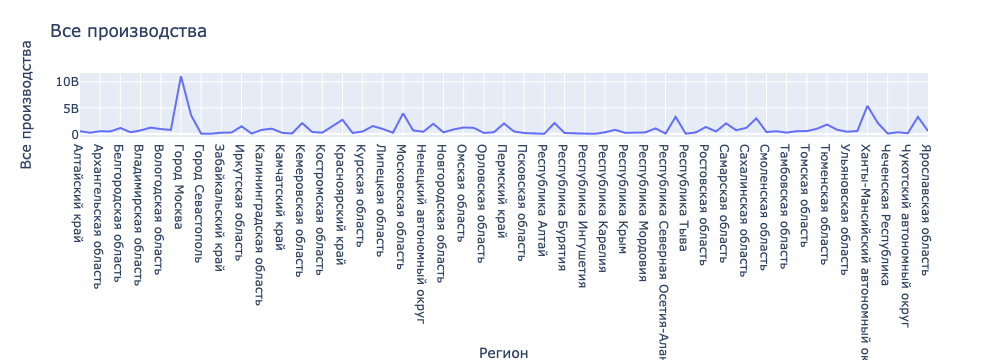

In [797]:
fig = px.line(df_reg_prod_total, y='Все производства', width = 900, title = 'Все производства')
fig.show()

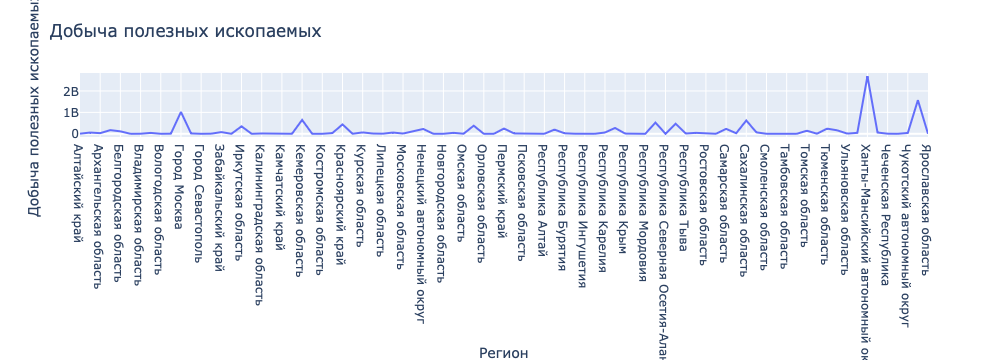

In [798]:
fig = px.line(df_reg_prod_mining, y='Добыча полезных ископаемых', width = 900, title = 'Добыча полезных ископаемых')
fig.show()

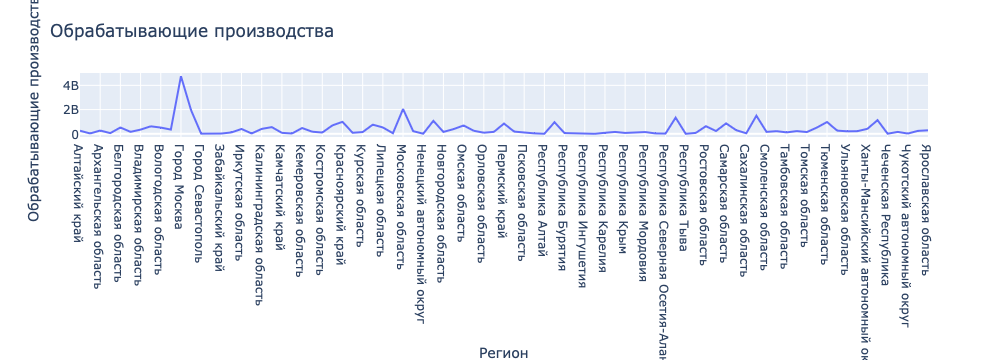

In [799]:
fig = px.line(df_reg_prod_manufactor, y='Обрабатывающие производства', width = 900, title = 'Обрабатывающие производства')
fig.show()

In [800]:
#Посмотрим где больше всего
df_reg_prod_total.loc[df_reg_prod_total['Все производства'].idxmax()]

Производство
Все производства    1.107385e+10
Name: Город Москва, dtype: float64

In [801]:
#посмотреть где меньше всего
df_reg_prod_total.loc[df_reg_prod_total['Все производства'].idxmin()]

Производство
Все производства    6804462.22
Name: Республика Ингушетия, dtype: float64

In [802]:
#Среднее значение по всем регионам:
print(df_reg_prod_total.mean().round(2))

Производство
Все производства    9.964343e+08
dtype: float64


In [803]:
#Сохраним данную таблицу для дальнейшей работы:
df_reg_prod_total = df_reg_prod_total.to_csv('data/total/df_reg_prod_total.csv', index=False)

In [804]:
#Посмотрим где больше всего Обрабатывающих производств:
df_reg_prod_manufactor.loc[df_reg_prod_manufactor['Обрабатывающие производства'].idxmax()]

Производство
Обрабатывающие производства    4.753555e+09
Name: Город Москва, dtype: float64

In [805]:
#посмотреть где меньше всего Обрабатывающих производств:
df_reg_prod_manufactor.loc[df_reg_prod_manufactor['Обрабатывающие производства'].idxmin()]

Производство
Обрабатывающие производства    583659.33
Name: Республика Тыва, dtype: float64

In [806]:
#Среднее значение по всем регионам:
print(df_reg_prod_manufactor.mean().round(2))

Производство
Обрабатывающие производства    3.956013e+08
dtype: float64


In [807]:
#Сохраним данную таблицу для дальнейшей работы:
df_reg_prod_manufactor = df_reg_prod_manufactor.to_csv('data/total/df_reg_prod_manufactor.csv', index=False)

In [808]:
#Посмотрим где больше всего Добычи полезных ископаемых:
df_reg_prod_mining.loc[df_reg_prod_mining['Добыча полезных ископаемых'].idxmax()]

Производство
Добыча полезных ископаемых    2.690549e+09
Name: Ханты-Мансийский автономный округ - Югра, dtype: float64

In [809]:
#посмотреть где меньше всего Добычи полезных ископаемых:
df_reg_prod_mining.loc[df_reg_prod_mining['Добыча полезных ископаемых'].idxmin()]

Производство
Добыча полезных ископаемых    130046.71
Name: Республика Мордовия, dtype: float64

In [810]:
#Среднее значение по всем регионам:
print(df_reg_prod_mining.mean().round(2))

Производство
Добыча полезных ископаемых    1.393326e+08
dtype: float64


In [811]:
#Сохраним данную таблицу для дальнейшей работы:
df_reg_prod_mining = df_reg_prod_mining.to_csv('data/total/df_reg_prod_mining.csv', index=False)

In [820]:
#Преобразованная таблица:
df_reg_prod_mining = pd.read_csv('data/total/df_reg_prod_mining.csv')
display(df_reg_prod_mining.head(3))

,Добыча полезных ископаемых
0,5418837.75
1,58775378.13
2,29868057.62


**Выводы: Москва является неоспоримым лидером по суммарному объёму отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами, по видам деятельности.Потому что именно на Москву приходится больше всего Обрабатывающих производств, это и повлияло на суммарный рейтиинг. Меньше всего данный показатель в Республике Ингушетия. Как и следовало ожидать лидером по Добыче полезных ископаемых является Ханты-Мансийский автономный округ - Югра, а меньше всего в Мордовии.**

### `13. Оборот розничной торговли на душу населения, в рублях.`

In [812]:
retail = pd.read_excel('data/retail_turnover_per_capita_2000_2021.xls', skiprows=2)
display(retail.head(3))

,Unnamed: 0,Unnamed: 1,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,NaN,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,...,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год
1,Российская Федерация,рубль,16046,21031,25913,31557,39166,49063,60901,76111,...,149401,165051,180410,188017,192541,202568,215074,229104,231283,270606
2,Центральный федеральный округ,рубль,26062,33630,40010,46760,57011,68302,81774,97965,...,188757,207394,231873,237737,243426,258278,277011,296368,301192,354141


In [816]:
#Преобразованная таблица:
df_retail = pd.read_csv('data/total/13_df_retail.csv')
display(df_retail.head(3))

,Регион,Оборот розничной торговли
0,Белгородская область,114915.23
1,Брянская область,109399.95
2,Владимирская область,87961.45


**Вывод: Лидером конечно же является Москва, несмотря на то что среднее значение за 20 лет сильно отличается от сегодняшней ситуации, на втором месте Сахалин, тк там очень дорогая доставка. Меньше всего в Республика Ингушетия автономном округе**

### `14. Сведения о заболеваемости алкоголизмом и наркоманией, на 100 тыс. населения (2005–2018):`

➔ Речь идёт о впервые установленном диагнозе, в данном случае — о постановке на учёт в диспансере. То есть если в прошлом году человек был признан алкоголиком, в этом году он уже не учитывается в статистике, если стоит на учёте или вылечился и был снят с учёта. Также если человек не попал на учёт, хотя соответствует критериям постановки соответствующего диагноза, он не будет учтён в данной статистике. Таким образом, эти цифры занижены. Кроме того, так как показатель приводится именно по впервые выявленным случаям, в теории его можно аккумулировать (но с оговорками).
 
➔ Показатель на 100 тысяч населения — привычный показатель в эпидемиологии. Однако очевидно, что в данном случае он рассчитывается по всей популяции, хотя, возможно, такой диагноз ставится чаще в некоторых когортах.

➔ В файле четыре листа. Отдельно приводятся показатели за 2017–2018 гг., так как взяты из другого источника, и там немного иначе написаны названия регионов.

Откроем файлы по заболеваемости алкоголизмом:

In [ ]:
alco_2005_2016 = pd.read_excel('data/drug_alco.xlsx', sheet_name='alco')
alco_2005_2016.head()

In [ ]:
alco_2017_2018 = pd.read_excel('data/drug_alco.xlsx', sheet_name='alco1718')

Создадим функцию по обработке таблиц и обединим их

In [ ]:
def clean_alco(data_alco):
    alco_fed = data_alco[data_alco['region'].str.contains('федеральный округ|Федерация|район')].index
    data_alco.drop(alco_fed, axis = 0, inplace=True)
    data_alco.rename(columns={'region':"Регион"}, inplace=True)
    data_alco["Регион"] = data_alco["Регион"].str.strip()
    data_alco.set_index('Регион', inplace=True)
    return data_alco

# применим функцию ко всем данным в таблицах:
list_df = [alco_2005_2016,alco_2017_2018]
for i in list_df:
    clean_alco(i)
    i = i.fillna(0)
     
display(alco_2005_2016.head())

In [ ]:
alco = alco_2005_2016.merge(alco_2017_2018,on='Регион',how='inner')
alco

Посмотрим визуально на наши данные:

In [ ]:
alco.hist(figsize = (15,15), grid = False);
plt.show()

In [ ]:
grouped_alco = alco.groupby(['Регион'])[2005].max()
grouped_alco = grouped_alco.nlargest(10)
grouped_alco.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
grouped_alco = alco.groupby(['Регион'])[2018].max()
grouped_alco = grouped_alco.nlargest(10)
grouped_alco.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
alco_2005=alco[2005].mean()
alco_2005

In [ ]:
alco_2018=alco[2018].mean()
alco_2018

**Вывод: Лидером по заболеваемости алкоголизмом в 2005 и 2018 году является Чукотский автономный округ. За эти годы заболиеваемость алкоголизмом в России снизилас в 3 раза**

Проделаем те же дейтсвия с данными по заьолеванию наркоманией.

In [ ]:
drug_2005_2016 = pd.read_excel('data/drug_alco.xlsx', sheet_name='drugs')

In [ ]:
drug_2017_2018 = pd.read_excel('data/drug_alco.xlsx', sheet_name='drug1718')

In [ ]:
def clean_drug(data_drug):
    drug_fed = data_drug[data_drug['region'].str.contains('федеральный округ|Федерация|район')].index
    data_drug.drop(drug_fed, axis = 0, inplace=True)
    data_drug.rename(columns={'region':"Регион"}, inplace=True)
    data_drug["Регион"] = data_drug["Регион"].str.strip()
    data_drug.set_index('Регион', inplace=True)
    return data_drug

# применим функцию ко всем данным в таблицах:
list_df = [drug_2005_2016,drug_2017_2018]
for i in list_df:
    clean_drug(i)
    i = i.fillna(0)
     
display(drug_2005_2016.head())

In [ ]:
drug = drug_2005_2016.merge(drug_2017_2018,on='Регион',how='inner')
drug

In [ ]:
drug.hist(figsize = (15,15), grid = False);
plt.show()

In [ ]:
grouped_drug = drug.groupby(['Регион'])[2005].max()
grouped_drug = grouped_drug.nlargest(10)
grouped_drug.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
 grouped_drug = drug.groupby(['Регион'])[2018].max()
grouped_drug = grouped_drug.nlargest(10)
grouped_drug.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
drug_2005=drug[2005].mean()
drug_2005

In [ ]:
drug_2018=drug[2018].mean()
drug_2018

**Вывод: За годжы заболеваемость наркоманией снизилось почти в 2 раза. В 2005 ярко выраженного лидера по заболеваниям не было, а вот в 2018 появился - это Еврейская автономная республика**

создадим функцию по преобразованию регионов:

### `15. Рождённые в этом месяце, по регионам, без учёта мертворождённых.`

In [ ]:
newborn = pd.read_csv('data/newborn_2006_2022_monthly.csv',sep=';', decimal=',')
display(newborn.head())

In [ ]:
newborn.rename(columns={'Region':"Регион"}, inplace=True)
newborn["Регион"] = newborn["Регион"].str.strip()

In [ ]:
newborn_fed = newborn[newborn['Регион'].str.contains('федеральный округ|Федерация|район')].index
newborn.drop(newborn_fed, axis = 0, inplace=True)
newborn['Регион'].nunique()

In [ ]:
sorted(newborn['Регион'])

Удалим лишние регионы:

In [ ]:
newborn_other = newborn[newborn['Регион'].str.contains('Эвенкийский автономный округ|Таймырский|Тюменская область|Таймырский автономный округ|Московская обл. в старых границах|Москва в старых границах|Архангельская область|Агинский Бурятский округ|Коми-Пермяцкий округ|Корякский округ')].index
newborn.drop(newborn_other, axis = 0, inplace=True)

In [ ]:
newborn['Регион'].nunique()

Суммируем результаты по месяцам и выведем единые столбцы по годам

In [ ]:
newborn[2006] = newborn[['январь 2006 г.', 'февраль 2006 г.', 'март 2006 г.', 'апрель 2006 г.', 'май 2006 г.', 
                         'июнь 2006 г.','июль 2006 г.','август 2006 г.','сентябрь 2006 г.','октябрь 2006 г.',
                        'ноябрь 2006 г.','декабрь 2006 г.']].sum(axis=1)
newborn[2007] = newborn[['январь 2007 г.', 'февраль 2007 г.', 'март 2007 г.', 'апрель 2007 г.', 'май 2007 г.', 
                         'июнь 2007 г.','июль 2007 г.','август 2007 г.','сентябрь 2007 г.','октябрь 2007 г.',
                        'ноябрь 2007 г.','декабрь 2007 г.']].sum(axis=1)
newborn[2008] = newborn[['январь 2008 г.', 'февраль 2008 г.', 'март 2008 г.', 'апрель 2008 г.', 'май 2008 г.', 
                         'июнь 2008 г.','июль 2008 г.','август 2008 г.','сентябрь 2008 г.','октябрь 2008 г.',
                        'ноябрь 2008 г.','декабрь 2008 г.']].sum(axis=1)
newborn[2009] = newborn[['январь 2009 г.', 'февраль 2009 г.', 'март 2009 г.', 'апрель 2009 г.', 'май 2009 г.', 
                         'июнь 2009 г.','июль 2009 г.','август 2009 г.','сентябрь 2009 г.','октябрь 2009 г.',
                        'ноябрь 2009 г.','декабрь 2009 г.']].sum(axis=1)
newborn[2010] = newborn[['январь 2010 г.', 'февраль 2010 г.', 'март 2010 г.', 'апрель 2010 г.', 'май 2010 г.', 
                         'июнь 2010 г.','июль 2010 г.','август 2010 г.','сентябрь 2010 г.','октябрь 2010 г.',
                        'ноябрь 2010 г.','декабрь 2010 г.']].sum(axis=1)
newborn[2011] = newborn[['январь 2011 г.', 'февраль 2011 г.', 'март 2011 г.', 'апрель 2011 г.', 'май 2011 г.', 
                         'июнь 2011 г.','июль 2011 г.','август 2011 г.','сентябрь 2011 г.','октябрь 2011 г.',
                        'ноябрь 2011 г.','декабрь 2011 г.']].sum(axis=1)
newborn[2012] = newborn[['январь 2012 г.', 'февраль 2012 г.', 'март 2012 г.', 'апрель 2012 г.', 'май 2012 г.', 
                         'июнь 2012 г.','июль 2012 г.','август 2012 г.','сентябрь 2012 г.','октябрь 2012 г.',
                        'ноябрь 2012 г.','декабрь 2012 г.']].sum(axis=1)
newborn[2013] = newborn[['январь 2013 г.', 'февраль 2013 г.', 'март 2013 г.', 'апрель 2013 г.', 'май 2013 г.', 
                         'июнь 2013 г.','июль 2013 г.','август 2013 г.','сентябрь 2013 г.','октябрь 2013 г.',
                        'ноябрь 2013 г.','декабрь 2013 г.']].sum(axis=1)
newborn[2014] = newborn[['январь 2014 г.', 'февраль 2014 г.', 'март 2014 г.', 'апрель 2014 г.', 'май 2014 г.', 
                         'июнь 2014 г.','июль 2014 г.','август 2014 г.','сентябрь 2014 г.','октябрь 2014 г.',
                        'ноябрь 2014 г.','декабрь 2014 г.']].sum(axis=1)
newborn[2015] = newborn[['январь 2015 г.', 'февраль 2015 г.', 'март 2015 г.', 'апрель 2015 г.', 'май 2015 г.', 
                         'июнь 2015 г.','июль 2015 г.','август 2015 г.','сентябрь 2015 г.','октябрь 2015 г.',
                        'ноябрь 2015 г.','декабрь 2015 г.']].sum(axis=1)
newborn[2016] = newborn[['январь 2016 г.', 'февраль 2016 г.', 'март 2016 г.', 'апрель 2016 г.', 'май 2016 г.', 
                         'июнь 2016 г.','июль 2016 г.','август 2016 г.','сентябрь 2016 г.','октябрь 2016 г.',
                        'ноябрь 2016 г.','декабрь 2016 г.']].sum(axis=1)
newborn[2017] = newborn[['январь 2017 г.', 'февраль 2017 г.', 'март 2017 г.', 'апрель 2017 г.', 'май 2017 г.', 
                         'июнь 2017 г.','июль 2017 г.','август 2017 г.','сентябрь 2017 г.','октябрь 2017 г.',
                        'ноябрь 2017 г.','декабрь 2017 г.']].sum(axis=1)
newborn[2018] = newborn[['январь 2018 г.', 'февраль 2018 г.', 'март 2018 г.', 'апрель 2018 г.', 'май 2018 г.', 
                         'июнь 2018 г.','июль 2018 г.','август 2018 г.','сентябрь 2018 г.','октябрь 2018 г.',
                        'ноябрь 2018 г.','декабрь 2018 г.']].sum(axis=1)
newborn[2019] = newborn[['январь 2019 г.', 'февраль 2019 г.', 'март 2019 г.', 'апрель 2019 г.', 'май 2019 г.', 
                         'июнь 2019 г.','июль 2019 г.','август 2019 г.','сентябрь 2019 г.','октябрь 2019 г.',
                        'ноябрь 2019 г.','декабрь 2019 г.']].sum(axis=1)
newborn[2020] = newborn[['январь 2020 г.', 'февраль 2020 г.', 'март 2020 г.', 'апрель 2020 г.', 'май 2020 г.', 
                         'июнь 2020 г.','июль 2020 г.','август 2020 г.','сентябрь 2020 г.','октябрь 2020 г.',
                        'ноябрь 2020 г.','декабрь 2020 г.']].sum(axis=1)
newborn[2021] = newborn[['январь 2021 г.', 'февраль 2021 г.', 'март 2021 г.', 'апрель 2021 г.', 'май 2021 г.', 
                         'июнь 2021 г.','июль 2021 г.','август 2021 г.','сентябрь 2021 г.','октябрь 2021 г.',
                        'ноябрь 2021 г.','декабрь 2021 г.']].sum(axis=1)


In [ ]:
newborn.drop(['январь 2006 г.', 'февраль 2006 г.', 'март 2006 г.', 'апрель 2006 г.', 'май 2006 г.', 
                         'июнь 2006 г.','июль 2006 г.','август 2006 г.','сентябрь 2006 г.','октябрь 2006 г.',
                        'ноябрь 2006 г.','декабрь 2006 г.','январь 2007 г.', 'февраль 2007 г.', 'март 2007 г.', 'апрель 2007 г.', 'май 2007 г.', 
                         'июнь 2007 г.','июль 2007 г.','август 2007 г.','сентябрь 2007 г.','октябрь 2007 г.',
                        'ноябрь 2007 г.','декабрь 2007 г.', 'январь 2008 г.', 'февраль 2008 г.', 'март 2008 г.', 'апрель 2008 г.', 'май 2008 г.', 
                         'июнь 2008 г.','июль 2008 г.','август 2008 г.','сентябрь 2008 г.','октябрь 2008 г.',
                        'ноябрь 2008 г.','декабрь 2008 г.', 'январь 2009 г.', 'февраль 2009 г.', 'март 2009 г.', 'апрель 2009 г.', 'май 2009 г.', 
                         'июнь 2009 г.','июль 2009 г.','август 2009 г.','сентябрь 2009 г.','октябрь 2009 г.',
                        'ноябрь 2009 г.','декабрь 2009 г.', 'январь 2010 г.', 'февраль 2010 г.', 'март 2010 г.', 'апрель 2010 г.', 'май 2010 г.', 
                         'июнь 2010 г.','июль 2010 г.','август 2010 г.','сентябрь 2010 г.','октябрь 2010 г.',
                        'ноябрь 2010 г.','декабрь 2010 г.', 'январь 2011 г.', 'февраль 2011 г.', 'март 2011 г.', 'апрель 2011 г.', 'май 2011 г.', 
                         'июнь 2011 г.','июль 2011 г.','август 2011 г.','сентябрь 2011 г.','октябрь 2011 г.',
                        'ноябрь 2011 г.','декабрь 2011 г.', 'январь 2012 г.', 'февраль 2012 г.', 'март 2012 г.', 'апрель 2012 г.', 'май 2012 г.', 
                         'июнь 2012 г.','июль 2012 г.','август 2012 г.','сентябрь 2012 г.','октябрь 2012 г.',
                        'ноябрь 2012 г.','декабрь 2012 г.', 'январь 2013 г.', 'февраль 2013 г.', 'март 2013 г.', 'апрель 2013 г.', 'май 2013 г.', 
                         'июнь 2013 г.','июль 2013 г.','август 2013 г.','сентябрь 2013 г.','октябрь 2013 г.',
                        'ноябрь 2013 г.','декабрь 2013 г.', 'январь 2014 г.', 'февраль 2014 г.', 'март 2014 г.', 'апрель 2014 г.', 'май 2014 г.', 
                         'июнь 2014 г.','июль 2014 г.','август 2014 г.','сентябрь 2014 г.','октябрь 2014 г.',
                        'ноябрь 2014 г.','декабрь 2014 г.', 'январь 2015 г.', 'февраль 2015 г.', 'март 2015 г.', 'апрель 2015 г.', 'май 2015 г.', 
                         'июнь 2015 г.','июль 2015 г.','август 2015 г.','сентябрь 2015 г.','октябрь 2015 г.',
                        'ноябрь 2015 г.','декабрь 2015 г.', 'январь 2016 г.', 'февраль 2016 г.', 'март 2016 г.', 'апрель 2016 г.', 'май 2016 г.', 
                         'июнь 2016 г.','июль 2016 г.','август 2016 г.','сентябрь 2016 г.','октябрь 2016 г.',
                        'ноябрь 2016 г.','декабрь 2016 г.', 'январь 2017 г.', 'февраль 2017 г.', 'март 2017 г.', 'апрель 2017 г.', 'май 2017 г.', 
                         'июнь 2017 г.','июль 2017 г.','август 2017 г.','сентябрь 2017 г.','октябрь 2017 г.',
                        'ноябрь 2017 г.','декабрь 2017 г.', 'январь 2018 г.', 'февраль 2018 г.', 'март 2018 г.', 'апрель 2018 г.', 'май 2018 г.', 
                         'июнь 2018 г.','июль 2018 г.','август 2018 г.','сентябрь 2018 г.','октябрь 2018 г.',
                        'ноябрь 2018 г.','декабрь 2018 г.', 'январь 2019 г.', 'февраль 2019 г.', 'март 2019 г.', 'апрель 2019 г.', 'май 2019 г.', 
                         'июнь 2019 г.','июль 2019 г.','август 2019 г.','сентябрь 2019 г.','октябрь 2019 г.',
                        'ноябрь 2019 г.','декабрь 2019 г.', 'январь 2020 г.', 'февраль 2020 г.', 'март 2020 г.', 'апрель 2020 г.', 'май 2020 г.', 
                         'июнь 2020 г.','июль 2020 г.','август 2020 г.','сентябрь 2020 г.','октябрь 2020 г.',
                        'ноябрь 2020 г.','декабрь 2020 г.', 'январь 2021 г.', 'февраль 2021 г.', 'март 2021 г.', 'апрель 2021 г.', 'май 2021 г.', 
                         'июнь 2021 г.','июль 2021 г.','август 2021 г.','сентябрь 2021 г.','октябрь 2021 г.',
                        'ноябрь 2021 г.','декабрь 2021 г.'], axis = 1, inplace=True)

Дакже давайте удалим столбцы за 2022 год, тк там неполные данные:

In [ ]:
newborn.drop(['январь 2022 г.', 'февраль 2022 г.', 'март 2022 г.', 'апрель 2022 г.', 'май 2022 г.'], axis = 1, inplace=True)

In [ ]:
newborn.drop(['Unnamed: 198'], axis = 1, inplace=True)

In [ ]:
display(newborn.head())

In [ ]:
newborn.hist(figsize = (15,15), grid = False);
plt.show()

In [ ]:
grouped_newborn = newborn.groupby(['Регион'])[2006].max()
grouped_newborn = grouped_newborn.nlargest(10)
grouped_newborn.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
grouped_newborn = newborn.groupby(['Регион'])[2021].max()
grouped_newborn = grouped_newborn.nlargest(10)
grouped_newborn.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
newborn_2006=newborn[2006].mean()
newborn_2006

In [ ]:
newborn_2021=newborn[2021].mean()
newborn_2021

In [ ]:
newborn.loc[newborn[2021].idxmax()]

In [ ]:
newborn.loc[newborn[2021].idxmin()]

**Вывод: Средняя рождаемость почти не изменилась, а вот по отдельным регионам изменилась, например в Москве рождаемость выросла на 30%. **

### `16. Отношение числа занятых в экономике региона к численности населения региона в трудоспособном возрасте, %, 2012–2020 гг.`

In [ ]:
workers = pd.read_excel('data/Книга1.xlsx')
display(workers.head())

In [ ]:
cash.rename(columns={'region':"Регион"}, inplace=True)
cash["Регион"] = cash["Регион"].str.strip()

In [ ]:
cash_fed = cash[cash['Регион'].str.contains('федеральный округ|Федерация|район')].index
cash.drop(cash_fed, axis = 0, inplace=True)
cash['Регион'].nunique()

### `17. Сведения о преступлениях, совершённых отдельными категориями лиц за 2016–2022 гг., по месяцам, регионам, категориям лиц, категориям преступлений:`

Данные за каждый месяц агрегированы с предыдущими месяцами этого года (то есть январь 2022, далее — январь + февраль 2022 и так далее). Чтобы не смотреть все разбивки по месяцам, выгрузим последний суммарный месяц декабрь.

Вся информация в сумме приводится на первом листе каждого файла («строка 1» в терминологии документов). На остальных строках в зависимости от года приводится разбивка по категориям преступлений (особо тяжкие, тяжкие, средней тяжести, небольшой тяжести), а далее, если есть дополнительные листы (с 2021 года) — по главам и статьям Уголовного кодекса. Для более ранних годов разбивки по преступлениям нет — только по категориям преступлений.

In [ ]:
crimes_2016 = pd.read_excel('data/crimes/4-EGS_Razdel_4_122016.xls', sheet_name='Строка 1', skiprows=9)
display(crimes_2016.head())

In [ ]:

crimes_2016.rename(columns={'несовершеннолетними или при их соучастии\n':"Несовершенолетние"}, inplace=True)
crimes_2016.rename(columns={'ранее совершавшими преступления\n':"Ранее совершавшие"}, inplace=True)
crimes_2016.rename(columns={'в состоянии опьянения':"В состоянии алкогольного опьянения"}, inplace=True)
crimes_2016.rename(columns={'Unnamed: 10':"В состоянии наркотического опьянения"}, inplace=True)
crimes_2016.rename(columns={'Unnamed: 11':"В состоянии токсического опьянения"}, inplace=True)

crimes_2016['Групповые']= crimes_2016[['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n']].sum(axis=1)
crimes_2016 = crimes_2016.drop(['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n'], axis = 1)
crimes_2016 = crimes_2016.drop(['Unnamed: 0'],axis = 1)
crimes_2016 = crimes_2016.drop(['в том числе'],axis = 1)
crimes_2016 = crimes_2016.drop([0],axis = 0)
crimes_2016 = crimes_2016.drop([1],axis = 0)
display(crimes_2016.head())

In [ ]:
crimes_2016.rename(columns={'Unnamed: 1':"Регион"}, inplace=True)
crimes_2016_fed = crimes_2016[crimes_2016['Регион'].str.contains('федеральный округ|Федерация|район|УТ')].index
crimes_2016.drop(crimes_2016_fed, axis = 0, inplace=True)
display(crimes_2016.head())

In [ ]:
crimes_2017 = pd.read_excel('data/crimes/4-EGS_Razdel_4_122017.xls', sheet_name='Строка 1', skiprows=9)
crimes_2018 = pd.read_excel('data/crimes/4-EGS_Razdel_4_122018.xls', sheet_name='Строка 1', skiprows=9)
crimes_2019 = pd.read_excel('data/crimes/4-EGS_Razdel_4_122019.xls', sheet_name='Строка 1', skiprows=9)
crimes_2020 = pd.read_excel('data/crimes/4-EGS_Razdel_4_122020.xls', sheet_name='Строка 1', skiprows=9)
crimes_2021 = pd.read_excel('data/crimes/4-EGS_Razdel_5_122021.xls', sheet_name='Строка 1', skiprows=9)

In [ ]:
display(crimes_2017.head())

In [ ]:
crimes_2017.rename(columns={'несовершеннолетними или при их соучастии\n':"Несовершенолетние"}, inplace=True)
crimes_2017.rename(columns={'ранее совершавшими преступления\n':"Ранее совершавшие"}, inplace=True)
crimes_2017.rename(columns={'в состоянии опьянения':"В состоянии алкогольного опьянения"}, inplace=True)
crimes_2017.rename(columns={'Unnamed: 10':"В состоянии наркотического опьянения"}, inplace=True)
crimes_2017.rename(columns={'Unnamed: 11':"В состоянии токсического опьянения"}, inplace=True)

crimes_2017['Групповые']= crimes_2017[['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n']].sum(axis=1)
crimes_2017 = crimes_2017.drop(['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n'], axis = 1)
crimes_2017 = crimes_2017.drop(['Unnamed: 0'],axis = 1)
crimes_2017 = crimes_2017.drop(['в том числе'],axis = 1)
crimes_2017 = crimes_2017.drop([0],axis = 0)
crimes_2017 = crimes_2017.drop([1],axis = 0)
crimes_2017.rename(columns={'Unnamed: 1':"Регион"}, inplace=True)
crimes_2017_fed = crimes_2017[crimes_2017['Регион'].str.contains('федеральный округ|Федерация|район|УТ')].index
crimes_2017.drop(crimes_2017_fed, axis = 0, inplace=True)
display(crimes_2017.head())

In [ ]:
crimes_2018.rename(columns={'несовершеннолетними или при их соучастии\n':"Несовершенолетние"}, inplace=True)
crimes_2018.rename(columns={'ранее совершавшими преступления\n':"Ранее совершавшие"}, inplace=True)
crimes_2018.rename(columns={'в состоянии опьянения':"В состоянии алкогольного опьянения"}, inplace=True)
crimes_2018.rename(columns={'Unnamed: 10':"В состоянии наркотического опьянения"}, inplace=True)
crimes_2018.rename(columns={'Unnamed: 11':"В состоянии токсического опьянения"}, inplace=True)

crimes_2018['Групповые']= crimes_2018[['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n']].sum(axis=1)
crimes_2018 = crimes_2018.drop(['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n'], axis = 1)
crimes_2018 = crimes_2018.drop(['Unnamed: 0'],axis = 1)
crimes_2018 = crimes_2018.drop(['в том числе'],axis = 1)
crimes_2018 = crimes_2018.drop([0],axis = 0)
crimes_2018 = crimes_2018.drop([1],axis = 0)
crimes_2018.rename(columns={'Unnamed: 1':"Регион"}, inplace=True)
crimes_2018_fed = crimes_2018[crimes_2018['Регион'].str.contains('федеральный округ|Федерация|район|УТ')].index
crimes_2018.drop(crimes_2018_fed, axis = 0, inplace=True)
display(crimes_2018.head())

In [ ]:
crimes_2019.rename(columns={'несовершеннолетними или при их соучастии\n':"Несовершенолетние"}, inplace=True)
crimes_2019.rename(columns={'ранее совершавшими преступления\n':"Ранее совершавшие"}, inplace=True)
crimes_2019.rename(columns={'в состоянии опьянения':"В состоянии алкогольного опьянения"}, inplace=True)
crimes_2019.rename(columns={'Unnamed: 10':"В состоянии наркотического опьянения"}, inplace=True)
crimes_2019.rename(columns={'Unnamed: 11':"В состоянии токсического опьянения"}, inplace=True)

crimes_2019['Групповые']= crimes_2019[['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n']].sum(axis=1)
crimes_2019 = crimes_2019.drop(['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n'], axis = 1)
crimes_2019 = crimes_2019.drop(['Unnamed: 0'],axis = 1)
crimes_2019 = crimes_2019.drop(['в том числе'],axis = 1)
crimes_2019 = crimes_2019.drop([0],axis = 0)
crimes_2019 = crimes_2019.drop([1],axis = 0)
crimes_2019.rename(columns={'Unnamed: 1':"Регион"}, inplace=True)
crimes_2019_fed = crimes_2019[crimes_2019['Регион'].str.contains('федеральный округ|Федерация|район|УТ')].index
crimes_2019.drop(crimes_2019_fed, axis = 0, inplace=True)

In [ ]:
display(crimes_2019.head())

In [ ]:
crimes_2020.rename(columns={'несовершеннолетними или при их соучастии\n':"Несовершенолетние"}, inplace=True)
crimes_2020.rename(columns={'ранее совершавшими преступления\n':"Ранее совершавшие"}, inplace=True)
crimes_2020.rename(columns={'в состоянии опьянения':"В состоянии алкогольного опьянения"}, inplace=True)
crimes_2020.rename(columns={'Unnamed: 10':"В состоянии наркотического опьянения"}, inplace=True)
crimes_2020.rename(columns={'Unnamed: 11':"В состоянии токсического опьянения"}, inplace=True)

crimes_2020['Групповые']= crimes_2020[['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n']].sum(axis=1)
crimes_2020 = crimes_2020.drop(['группой лиц\n', 'группой лиц по предварительному сговору\n', 
                                       'организованной группой\n', 'преступным сообществом (преступной организацией)\n'], axis = 1)
crimes_2020 = crimes_2020.drop(['Unnamed: 0'],axis = 1)
crimes_2020 = crimes_2020.drop(['в том числе'],axis = 1)
crimes_2020 = crimes_2020.drop([0],axis = 0)
crimes_2020 = crimes_2020.drop([1],axis = 0)
crimes_2020.rename(columns={'Unnamed: 1':"Регион"}, inplace=True)
crimes_2020_fed = crimes_2020[crimes_2020['Регион'].str.contains('федеральный округ|Федерация|район|УТ')].index
crimes_2020.drop(crimes_2020_fed, axis = 0, inplace=True)

In [ ]:
display(crimes_2020.head())

Таблица за 2021 год имеет другие данные:

In [ ]:
crimes_2021 = pd.read_excel('data/crimes/4-EGS_Razdel_5_122021.xls', sheet_name='Строка 1', skiprows=9)
display(crimes_2021.head())

In [ ]:
crimes_2021.rename(columns={'несовершеннолетними или при их соучастии':"Несовершенолетние"}, inplace=True)
crimes_2021.rename(columns={'ранее совершавшими преступления':"Ранее совершавшие"}, inplace=True)
crimes_2021.rename(columns={'в состоянии опьянения':"В состоянии алкогольного опьянения"}, inplace=True)
crimes_2021.rename(columns={'Unnamed: 10':"В состоянии наркотического опьянения"}, inplace=True)
crimes_2021.rename(columns={'Unnamed: 11':"В состоянии токсического опьянения"}, inplace=True)

crimes_2021['Групповые']= crimes_2021[['группой лиц', 'группой лиц по предварительному сговору', 
                                       'организованной группой', 'преступным сообществом (преступной организацией)']].sum(axis=1)
crimes_2021 = crimes_2021.drop(['группой лиц', 'группой лиц по предварительному сговору', 
                                       'организованной группой', 'преступным сообществом (преступной организацией)'], axis = 1)
crimes_2021 = crimes_2021.drop(['Unnamed: 0'],axis = 1)
crimes_2021 = crimes_2021.drop(['членом семьи, супругом, сожителем, сексуальным партнером (в том числе бывшими)'],axis = 1)
crimes_2021 = crimes_2021.drop(['из них в отношении'],axis = 1)
crimes_2021 = crimes_2021.drop(['иностранными гражданами и лицами без гражданства'],axis = 1)
crimes_2021 = crimes_2021.drop(['из них'],axis = 1)
crimes_2021 = crimes_2021.drop(['Unnamed: 17'],axis = 1)
crimes_2021 = crimes_2021.drop(['Unnamed: 18'],axis = 1)
crimes_2021 = crimes_2021.drop(['Unnamed: 14'],axis = 1)
crimes_2021 = crimes_2021.drop(['в том числе'],axis = 1)
crimes_2021 = crimes_2021.drop([0],axis = 0)
crimes_2021 = crimes_2021.drop([1],axis = 0)
crimes_2021.rename(columns={'Unnamed: 1':"Регион"}, inplace=True)
crimes_2021_fed = crimes_2021[crimes_2021['Регион'].str.contains('федеральный округ|Федерация|район|УТ')].index
crimes_2021.drop(crimes_2021_fed, axis = 0, inplace=True)
display(crimes_2021.head())

Создадим функцию по преобразованию регионов

Создадим  дополнительные признаки: `ВСЕГО` и `В состоянии алгог.,наркот.,токсич. опянений`. А остальные удалим.

In [ ]:
crimes_2016['Всего'] = crimes_2016[['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые']].sum(axis=1)
crimes_2016['В состоянии алгог.,наркот.,токсич. опянений']=crimes_2016[['В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения']].sum(axis=1)
crimes_2016 = crimes_2016.drop(['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые'],axis = 1)
crimes_2016.head()


In [ ]:
crimes_2017['Всего'] = crimes_2017[['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые']].sum(axis=1)
crimes_2017['В состоянии алгог.,наркот.,токсич. опянений']=crimes_2017[['В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения']].sum(axis=1)
crimes_2017 = crimes_2017.drop(['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые'],axis = 1)

crimes_2018['Всего'] = crimes_2018[['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые']].sum(axis=1)
crimes_2018['В состоянии алгог.,наркот.,токсич. опянений']=crimes_2018[['В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения']].sum(axis=1)
crimes_2018 = crimes_2018.drop(['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые'],axis = 1)

crimes_2019['Всего'] = crimes_2019[['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые']].sum(axis=1)
crimes_2019['В состоянии алгог.,наркот.,токсич. опянений']=crimes_2019[['В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения']].sum(axis=1)
crimes_2019 = crimes_2019.drop(['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые'],axis = 1)

crimes_2020['Всего'] = crimes_2020[['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые']].sum(axis=1)
crimes_2020['В состоянии алгог.,наркот.,токсич. опянений']=crimes_2020[['В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения']].sum(axis=1)
crimes_2020 = crimes_2020.drop(['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые'],axis = 1)

crimes_2021['Всего'] = crimes_2021[['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые']].sum(axis=1)
crimes_2021['В состоянии алгог.,наркот.,токсич. опянений']=crimes_2021[['В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения']].sum(axis=1)
crimes_2021 = crimes_2021.drop(['Несовершенолетние', 'Ранее совершавшие', 'В состоянии алкогольного опьянения', 'В состоянии наркотического опьянения', 'В состоянии токсического опьянения', 'Групповые'],axis = 1)

Объединим таблицы, Сделаем две таблицы по годам: `crimes_total` и `crimes_drug`

Сделаем индексом столбец `Регион`

In [ ]:
crimes_2016["Регион"] = crimes_2016["Регион"].str.strip()
crimes_2016.set_index('Регион', inplace=True)

crimes_2017["Регион"] = crimes_2017["Регион"].str.strip()
crimes_2017.set_index('Регион', inplace=True)

crimes_2018["Регион"] = crimes_2018["Регион"].str.strip()
crimes_2018.set_index('Регион', inplace=True)

crimes_2019["Регион"] = crimes_2019["Регион"].str.strip()
crimes_2019.set_index('Регион', inplace=True)

crimes_2020["Регион"] = crimes_2020["Регион"].str.strip()
crimes_2020.set_index('Регион', inplace=True)

crimes_2021["Регион"] = crimes_2021["Регион"].str.strip()
crimes_2021.set_index('Регион', inplace=True)


In [ ]:
crimes_2016_total = crimes_2016.loc[:, ['Всего']]
crimes_2017_total = crimes_2017.loc[:, ['Всего']]
crimes_2018_total = crimes_2018.loc[:, ['Всего']]
crimes_2019_total = crimes_2019.loc[:, ['Всего']]
crimes_2020_total = crimes_2020.loc[:, ['Всего']]
crimes_2021_total = crimes_2021.loc[:, ['Всего']]

crimes_2016_total.rename(columns={'Всего':2016},inplace=True)
crimes_2017_total.rename(columns={'Всего':2017},inplace=True)
crimes_2018_total.rename(columns={'Всего':2018},inplace=True)
crimes_2019_total.rename(columns={'Всего':2019},inplace=True)
crimes_2020_total.rename(columns={'Всего':2020},inplace=True)
crimes_2021_total.rename(columns={'Всего':2021},inplace=True)


crimes_total = crimes_2016_total.merge(crimes_2017_total,on=['Регион'],how='left')
crimes_total = crimes_total.merge(crimes_2018_total,on=['Регион'],how='left')
crimes_total = crimes_total.merge(crimes_2019_total,on=['Регион'],how='left')
crimes_total = crimes_total.merge(crimes_2020_total,on=['Регион'],how='left')
crimes_total = crimes_total.merge(crimes_2021_total,on=['Регион'],how='left')


crimes_2016_drug = crimes_2016.loc[:, ['В состоянии алгог.,наркот.,токсич. опянений']]
crimes_2017_drug = crimes_2017.loc[:, ['В состоянии алгог.,наркот.,токсич. опянений']]
crimes_2018_drug = crimes_2018.loc[:, ['В состоянии алгог.,наркот.,токсич. опянений']]
crimes_2019_drug = crimes_2019.loc[:, ['В состоянии алгог.,наркот.,токсич. опянений']]
crimes_2020_drug = crimes_2020.loc[:, ['В состоянии алгог.,наркот.,токсич. опянений']]
crimes_2021_drug = crimes_2021.loc[:, ['В состоянии алгог.,наркот.,токсич. опянений']]

crimes_2016_drug.rename(columns={'В состоянии алгог.,наркот.,токсич. опянений':2016},inplace=True)
crimes_2017_drug.rename(columns={'В состоянии алгог.,наркот.,токсич. опянений':2017},inplace=True)
crimes_2018_drug.rename(columns={'В состоянии алгог.,наркот.,токсич. опянений':2018},inplace=True)
crimes_2019_drug.rename(columns={'В состоянии алгог.,наркот.,токсич. опянений':2019},inplace=True)
crimes_2020_drug.rename(columns={'В состоянии алгог.,наркот.,токсич. опянений':2020},inplace=True)
crimes_2021_drug.rename(columns={'В состоянии алгог.,наркот.,токсич. опянений':2021},inplace=True)

crimes_drug = crimes_2016_drug.merge(crimes_2017_drug,on=['Регион'],how='left')
crimes_drug = crimes_drug.merge(crimes_2018_drug,on=['Регион'],how='left')
crimes_drug = crimes_drug.merge(crimes_2019_drug,on=['Регион'],how='left')
crimes_drug = crimes_drug.merge(crimes_2020_drug,on=['Регион'],how='left')
crimes_drug = crimes_drug.merge(crimes_2021_drug,on=['Регион'],how='left')


display(crimes_total.head())
display(crimes_drug.head())

Посмотрим визуально на наши данные:

In [ ]:
crimes_total.hist(figsize = (15,15), grid = False);
plt.show()

In [ ]:
grouped_crimes_total = crimes_total.groupby(['Регион'])[2016].max()
grouped_crimes_total = grouped_crimes_total.nlargest(10)
grouped_crimes_total.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
grouped_crimes_drug = crimes_drug.groupby(['Регион'])[2016].max()
grouped_crimes_drug = grouped_crimes_drug.nlargest(10)
grouped_crimes_drug.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
grouped_crimes_total = crimes_total.groupby(['Регион'])[2021].max()
grouped_crimes_total = grouped_crimes_total.nlargest(10)
grouped_crimes_total.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
grouped_crimes_drug = crimes_drug.groupby(['Регион'])[2021].max()
grouped_crimes_drug = grouped_crimes_drug.nlargest(10)
grouped_crimes_drug.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
crimes_total_2016=crimes_total[2016].mean()
crimes_total_2016

In [ ]:
crimes_drug_2016=crimes_drug[2016].mean()
crimes_drug_2016

In [ ]:
crimes_total_2021=crimes_total[2021].mean()
crimes_total_2021

In [ ]:
crimes_drug_2021=crimes_drug[2021].mean()
crimes_drug_2021

In [ ]:
crimes_total.loc[crimes_total[2021].idxmax()]

In [ ]:
crimes_drug.loc[crimes_drug[2016].idxmax()]

In [ ]:
crimes_drug.loc[crimes_drug[2021].idxmax()]

In [ ]:
crimes_total.loc[crimes_total[2021].idxmin()]

**Выводы: Среднее совершение преступление с 2016 года снизилось на 21%. Лидером по совершению преступлений являютя Челябинская, Cвердловская области и республика Башкортастан. Следует заметить, что треть преступлений совершаются в состоянии алкогольного, наркотического и токсических опъянений**